In [1]:
from imblearn.metrics import geometric_mean_score
import numpy as np
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn import metrics
np.random.seed(13)
import time
from datetime import datetime, timedelta
from sklearn import svm
import pandas as pd

import matplotlib.pyplot as plt
import math
from __future__ import division
from sklearn.model_selection import KFold
from sklearn.preprocessing import normalize
from stockstats import StockDataFrame 
from googlefinance.client import get_price_data, get_prices_data, get_prices_time_data

files=['AAPL','AMZN','PEP','GOOGL','MSFT','FB','INTC','CSCO','CMCSA','NVDA','NFLX','BKNG','ADBE','AMGN','TXN','AVGO','PYPL','GILD','COST','QCOM']       
     
prices=list()
sentiment=list()
for file in files:
    param = {
        'q': file, # Stock symbol (ex: "AAPL")
        'i': "900", # Interval size in seconds ("86400" = 1 day intervals)
        'x': "NASD", # INDEXNASDAQStock exchange symbol on which stock is traded (ex: "NASD")
        'p': "2Y" # Period (Ex: "1Y" = 1 year)
        }
    sentimentVector =  pd.read_csv('/home/andrea/Desktop/NLFF/intrinioDatasetUpdated/Sentiment/'+file+'.csv')
    price= pd.read_csv('/home/andrea/Desktop/NLFF/TechnicalDatasetUpdated/'+file+'.csv')
    #alignment of data
    maxdata=max(sentimentVector['initTime'])
    mindata=min(sentimentVector['initTime'])
    price['Unnamed: 0'] = [datetime.strptime(row, '%Y-%m-%d %H:%M:%S') for row in price['Unnamed: 0']]
    price['Unnamed: 0'] = [row-timedelta(hours=8) for row in price['Unnamed: 0']]
    price=price[price['Unnamed: 0']>=mindata]
    price=price[price['Unnamed: 0']<=maxdata]
    print(sentimentVector[0:10])
    print(price[0:10])
    sentimentVector=sentimentVector.drop(['Unnamed: 0', 'initTime' ], axis=1)
    meanvector=np.concatenate((sentimentVector,pd.rolling_mean(sentimentVector,5)),axis=1)
    meanvector=np.concatenate((meanvector,pd.rolling_mean(sentimentVector,10)),axis=1)
    meanvector=np.concatenate((meanvector,pd.rolling_mean(sentimentVector,15)),axis=1)
    meanvector=np.concatenate((meanvector,pd.rolling_mean(sentimentVector,20)),axis=1)
    price=price.drop(['Unnamed: 0'],axis=1)
    #['macd','macds', 'boll_ub', 'boll_lb','rsi_6','rsi_12','vr_6_sma','wr_10','wr_6''close_10_sma''tr''middle_{}_sma'
    #df['dma'] = df['close_10_sma'] - df['close_50_sma'] pdi'] = cls._get_pdi(df, 14)df['mdi'] = cls._get_mdi(df, 14)
    #df['dx'] = cls._get_dx(df, 14) df['adx'] = df['dx_6_ema'] df['adxr'] = df['adx_6_ema']]
    #
    sentiment.append(meanvector)
    prices.append(price)

   Unnamed: 0             initTime  CONSTRAINING  LITIGIOUS  NEGATIVE  \
0           1  2017-08-14 13:45:00         0.000      0.000     0.000   
1           2  2017-08-14 14:00:00         0.000      0.000     0.000   
2           3  2017-08-14 14:15:00         0.000      0.000     1.000   
3           4  2017-08-14 14:30:00         0.000      0.000     1.000   
4           5  2017-08-14 14:45:00         0.250      0.250     1.250   
5           6  2017-08-14 15:00:00         1.125      0.625     1.125   
6           7  2017-08-14 15:15:00         1.125      1.625     3.125   
7           8  2017-08-14 15:30:00         1.125      1.625     3.125   
8           9  2017-08-14 15:45:00         1.125      1.625     4.125   
9          10  2017-08-14 16:00:00         1.125      1.625     4.125   

   POSITIVE  UNCERTAINTY  SUPERFLUOUS  INTERESTING  NUM_NEWS  
0       0.0        0.000          0.0         0.00         0  
1       0.0        0.000          0.0         0.00         0  
2      

/home/andrea/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:44: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=5,center=False).mean()
/home/andrea/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:45: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=10,center=False).mean()
/home/andrea/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:46: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=15,center=False).mean()
/home/andrea/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:47: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=20,center=False).mean()


   Unnamed: 0             initTime  CONSTRAINING  LITIGIOUS  NEGATIVE  \
0           1  2017-08-14 13:45:00      0.000000   0.000000  0.000000   
1           2  2017-08-14 14:00:00      0.000000   0.000000  0.333333   
2           3  2017-08-14 14:15:00      0.000000   0.250000  0.083333   
3           4  2017-08-14 14:30:00      0.000000   0.250000  2.083333   
4           5  2017-08-14 14:45:00      0.333333   0.208333  1.680556   
5           6  2017-08-14 15:00:00      0.333333   0.208333  1.680556   
6           7  2017-08-14 15:15:00      0.333333   0.208333  1.680556   
7           8  2017-08-14 15:30:00      0.333333   0.302083  1.920139   
8           9  2017-08-14 15:45:00      0.166667   0.651042  3.460069   
9          10  2017-08-14 16:00:00      0.166667   0.651042  3.460069   

   POSITIVE  UNCERTAINTY  SUPERFLUOUS  INTERESTING  NUM_NEWS  
0  0.000000     0.000000          0.0     0.000000         0  
1  0.333333     0.333333          0.0     0.000000         3  
2  0.58

   Unnamed: 0             initTime  CONSTRAINING  LITIGIOUS  NEGATIVE  \
0           1  2017-08-14 13:45:00           0.0        0.0       0.0   
1           2  2017-08-14 14:00:00           0.0        0.0       0.0   
2           3  2017-08-14 14:15:00           0.0        0.0       0.0   
3           4  2017-08-14 14:30:00           0.0        0.0       0.0   
4           5  2017-08-14 14:45:00           0.0        0.0       0.0   
5           6  2017-08-14 15:00:00           0.0        0.0       0.0   
6           7  2017-08-14 15:15:00           0.0        1.0       2.0   
7           8  2017-08-14 15:30:00           0.0        1.0       2.0   
8           9  2017-08-14 15:45:00           0.0        1.0       5.0   
9          10  2017-08-14 16:00:00           0.0        1.0       5.0   

   POSITIVE  UNCERTAINTY  SUPERFLUOUS  INTERESTING  NUM_NEWS  
0       0.0          0.0          0.0          0.0         0  
1       0.0          0.0          0.0          0.0         0  
2      

   Unnamed: 0             initTime  CONSTRAINING  LITIGIOUS  NEGATIVE  \
0           1  2017-08-14 13:45:00      0.000000   0.000000  0.000000   
1           2  2017-08-14 14:00:00      0.000000   0.000000  0.000000   
2           3  2017-08-14 14:15:00      0.000000   0.000000  0.000000   
3           4  2017-08-14 14:30:00      0.000000   0.000000  0.000000   
4           5  2017-08-14 14:45:00      0.333333   0.333333  1.666667   
5           6  2017-08-14 15:00:00      0.333333   0.333333  1.666667   
6           7  2017-08-14 15:15:00      0.333333   0.333333  1.666667   
7           8  2017-08-14 15:30:00      0.333333   0.333333  1.666667   
8           9  2017-08-14 15:45:00      0.333333   0.333333  3.666667   
9          10  2017-08-14 16:00:00      0.333333   0.333333  3.666667   

   POSITIVE  UNCERTAINTY  SUPERFLUOUS  INTERESTING  NUM_NEWS  
0       0.0     0.000000          0.0          0.0         0  
1       0.0     0.000000          0.0          0.0         0  
2      

   Unnamed: 0             initTime  CONSTRAINING  LITIGIOUS  NEGATIVE  \
0           1  2017-08-14 13:45:00           0.0        0.0       0.0   
1           2  2017-08-14 14:00:00           0.0        0.0       1.0   
2           3  2017-08-14 14:15:00           0.0        0.0       1.0   
3           4  2017-08-14 14:30:00           0.0        0.0       1.0   
4           5  2017-08-14 14:45:00           0.0        0.0       1.0   
5           6  2017-08-14 15:00:00           0.0        0.0       1.0   
6           7  2017-08-14 15:15:00           0.0        0.0       1.0   
7           8  2017-08-14 15:30:00           0.0        0.0       1.0   
8           9  2017-08-14 15:45:00           0.0        0.0       1.0   
9          10  2017-08-14 16:00:00           0.0        0.0       1.0   

   POSITIVE  UNCERTAINTY  SUPERFLUOUS  INTERESTING  NUM_NEWS  
0       0.0          0.0          0.0          0.0         0  
1       0.0          0.0          0.0          0.0         1  
2      

   Unnamed: 0             initTime  CONSTRAINING  LITIGIOUS  NEGATIVE  \
0           1  2017-08-14 13:45:00           0.0   0.000000       0.0   
1           2  2017-08-14 14:00:00           0.0   0.000000       0.0   
2           3  2017-08-14 14:15:00           0.0   0.000000       0.0   
3           4  2017-08-14 14:30:00           0.0   0.000000       0.0   
4           5  2017-08-14 14:45:00           0.0   0.000000       1.0   
5           6  2017-08-14 15:00:00           0.0   0.000000       1.0   
6           7  2017-08-14 15:15:00           0.0   0.000000       1.0   
7           8  2017-08-14 15:30:00           0.0   0.000000       1.0   
8           9  2017-08-14 15:45:00           0.0   0.333333       2.0   
9          10  2017-08-14 16:00:00           0.0   0.333333       2.0   

   POSITIVE  UNCERTAINTY  SUPERFLUOUS  INTERESTING  NUM_NEWS  
0  0.000000          0.0          0.0     0.000000         0  
1  0.000000          0.0          0.0     0.000000         0  
2  0.00

   Unnamed: 0             initTime  CONSTRAINING  LITIGIOUS  NEGATIVE  \
0           1  2017-08-14 13:45:00           0.0        0.0       0.0   
1           2  2017-08-14 14:00:00           0.0        0.0       0.0   
2           3  2017-08-14 14:15:00           0.0        0.0       0.0   
3           4  2017-08-14 14:30:00           0.0        0.0       0.0   
4           5  2017-08-14 14:45:00           0.0        0.0       0.0   
5           6  2017-08-14 15:00:00           0.0        0.0       0.0   
6           7  2017-08-14 15:15:00           0.0        0.0       0.0   
7           8  2017-08-14 15:30:00           0.0        0.0       0.0   
8           9  2017-08-14 15:45:00           0.0        0.0       0.0   
9          10  2017-08-14 16:00:00           0.0        0.0       0.0   

   POSITIVE  UNCERTAINTY  SUPERFLUOUS  INTERESTING  NUM_NEWS  
0       0.0          0.0          0.0          0.0         0  
1       0.0          0.0          0.0          0.0         0  
2      

   Unnamed: 0             initTime  CONSTRAINING  LITIGIOUS  NEGATIVE  \
0           1  2017-08-14 13:45:00           0.0        0.0       0.0   
1           2  2017-08-14 14:00:00           0.0        0.0       0.0   
2           3  2017-08-14 14:15:00           0.0        0.0       0.0   
3           4  2017-08-14 14:30:00           0.0        0.0       0.0   
4           5  2017-08-14 14:45:00           0.0        0.0       0.0   
5           6  2017-08-14 15:00:00           0.0        0.0       0.0   
6           7  2017-08-14 15:15:00           0.0        0.0       0.0   
7           8  2017-08-14 15:30:00           0.0        0.0       0.0   
8           9  2017-08-14 15:45:00           0.0        0.0       0.0   
9          10  2017-08-14 16:00:00           0.0        0.0       0.0   

   POSITIVE  UNCERTAINTY  SUPERFLUOUS  INTERESTING  NUM_NEWS  
0       0.0          0.0          0.0          0.0         0  
1       0.0          0.0          0.0          0.0         0  
2      

   Unnamed: 0             initTime  CONSTRAINING  LITIGIOUS  NEGATIVE  \
0           1  2017-08-14 13:45:00           0.0        0.0       0.0   
1           2  2017-08-14 14:00:00           0.0        0.0       0.0   
2           3  2017-08-14 14:15:00           0.0        0.0       0.0   
3           4  2017-08-14 14:30:00           0.0        0.0       0.0   
4           5  2017-08-14 14:45:00           0.0        0.0       0.0   
5           6  2017-08-14 15:00:00           0.0        0.0       0.0   
6           7  2017-08-14 15:15:00           0.0        0.0       0.0   
7           8  2017-08-14 15:30:00           0.0        0.0       0.0   
8           9  2017-08-14 15:45:00           0.0        0.0       0.0   
9          10  2017-08-14 16:00:00           0.0        0.0       0.0   

   POSITIVE  UNCERTAINTY  SUPERFLUOUS  INTERESTING  NUM_NEWS  
0       0.0          0.0          0.0          0.0         0  
1       0.0          0.0          0.0          0.0         0  
2      

   Unnamed: 0             initTime  CONSTRAINING  LITIGIOUS  NEGATIVE  \
0           1  2017-08-14 13:45:00           0.0        0.0       0.0   
1           2  2017-08-14 14:00:00           0.0        0.0       0.0   
2           3  2017-08-14 14:15:00           0.0        0.0       0.0   
3           4  2017-08-14 14:30:00           0.0        0.0       0.0   
4           5  2017-08-14 14:45:00           0.0        0.0       0.0   
5           6  2017-08-14 15:00:00           0.0        0.0       0.0   
6           7  2017-08-14 15:15:00           0.0        1.0       2.0   
7           8  2017-08-14 15:30:00           0.0        1.0       2.0   
8           9  2017-08-14 15:45:00           0.0        2.0       3.0   
9          10  2017-08-14 16:00:00           0.0        2.0       3.0   

   POSITIVE  UNCERTAINTY  SUPERFLUOUS  INTERESTING  NUM_NEWS  
0       0.0          0.0          0.0          0.0         0  
1       0.0          0.0          0.0          0.0         0  
2      

In [2]:
def smote(x,y):
    X_resampled, y_resampled = SMOTE().fit_sample(x, y)
    #print('check',sum(y_resampled)/len(y_resampled))
    return X_resampled,y_resampled
def balance(x,y):
    posindex=np.where( y == 1 )
    negindex=np.where( y == 0 )
    xt=[]
    yt=[]
    yindex=[]
    nindex=min(len(posindex[0]),len(negindex[0]))

    #for i in range(1,nindex):
    yt=np.concatenate((y[posindex[0][0:nindex]],y[negindex[0][0:nindex]]))
    xt=np.concatenate((x[posindex[0][0:nindex]],x[negindex[0][0:nindex]]))
    
    return xt,yt

def balanceup(x,y):
    posindex=np.where( y == 1 )
    negindex=np.where( y == 0 )
    xt=[]
    yt=[]
    yindex=[]
    
    if(len(posindex[0])!=0 and len(negindex[0])!=0):
       
        nindex=max(len(posindex[0]),len(negindex[0]))
        mini=min(len(posindex[0]),len(negindex[0]))
        diff=nindex-mini
        u=print(len(x[0]))
        for i in range(0,mini):
            yt.append(y[posindex[0][i]])
            yt.append(y[negindex[0][i]])
            xt.append(x[posindex[0][i]])
            xt.append(x[negindex[0][i]])
        #print('first',sum(yt)/len(yt)) 
        if(len(posindex[0])>len(negindex[0])):
            toextract=negindex
            enter=posindex
        else:
            toextract=posindex
            enter=negindex
        if(diff!=0 and len(toextract[0])!=0):
            for i in range(0,diff):
                r=np.random.randint(0,len(toextract))
                yt.append(y[toextract[0][r]])
                xt.append(x[toextract[0][r]])
                yt.append(y[enter[0][mini+i]])
                xt.append(x[enter[0][mini+i]])
    else:
        #print('Unbalance')
        u=1
        xt=x
        yt=y
    #print(sum(yt)/len(yt))              
    return xt,yt,u

Working on... AAPL
15.571701720841297
0.005338458253266777
Diff in tren train and test
0.5490716180371353
0.552212389380531
F1,score 0.5956580732700136
G-score: 0.3634347995889288
Accuracy 0.4725663716814159
Window: 140
[[ 95 411]
 [185 439]]
Vol pos 4.123865903385009
Vol neg 2.323144345124958


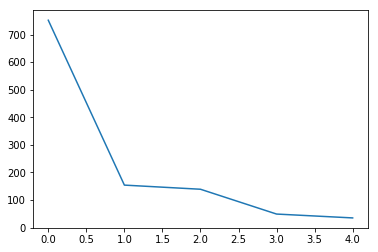

Real Percentage of gain: -31.60767021665101
Percentage of gain: 0.7234958962063006
Total gain: 817.5503627131197
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 39 339]
 [122 253]]
0.38778220451527223
Percentile:  1
[[18 50]
 [18 66]]
0.5526315789473685
Percentile:  2
[[38 22]
 [27 52]]
0.6474820143884892
Percentile:  3
[[ 0  0]
 [13 36]]
0.7346938775510204
Percentile:  4
[[ 0  0]
 [ 5 30]]
0.8571428571428571
000000000000000000000000000000000000000000000000
Working on... AMZN
11.150617492631287
0.0007590184265374819
Diff in tren train and test
0.6817579505300353
0.7782685512367491
F1,score 0.2544103992571959
G-score: 0.34489435245818795
Accuracy 0.29063604240282687
Window: 140
[[192  59]
 [744 137]]
Vol pos 2.190651053517944
Vol neg 2.433532394013054


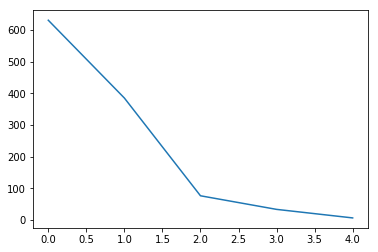

Real Percentage of gain: -168.0681636748729
Percentage of gain: -1.089578017477985
Total gain: -1233.402315785079
000000000000000000000000000000000000000000000000
Percentile:  0
[[177  22]
 [374  57]]
0.37142857142857144
Percentile:  1
[[ 11  25]
 [302  47]]
0.15064935064935064
Percentile:  2
[[ 4 12]
 [50 10]]
0.18421052631578946
Percentile:  3
[[ 0  0]
 [16 17]]
0.5151515151515151
Percentile:  4
[[0 0]
 [2 4]]
0.6666666666666666
000000000000000000000000000000000000000000000000
Working on... PEP
5.495274763738178
0.0
Diff in tren train and test
0.3288564850345357
0.8602150537634409
F1,score 0.8669856459330144
G-score: 0.7242031294356981
Accuracy 0.7864823348694316
Window: 140
[[ 59  32]
 [107 453]]
Vol pos 2.2992738775851316
Vol neg 1.2834795478216257


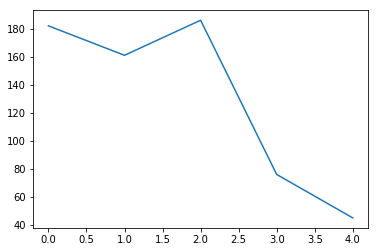

Real Percentage of gain: 103.63671564566042
Percentage of gain: 1.534292731453735
Total gain: 998.8245681763814
000000000000000000000000000000000000000000000000
Percentile:  0
[[45 27]
 [25 85]]
0.7142857142857143
Percentile:  1
[[14  5]
 [61 81]]
0.5900621118012422
Percentile:  2
[[  0   0]
 [ 20 166]]
0.8924731182795699
Percentile:  3
[[76]]
1.0
Percentile:  4
[[45]]
1.0
000000000000000000000000000000000000000000000000
Working on... GOOGL
9.280622946926826
0.003477111910863453
Diff in tren train and test
0.6279840848806366
0.5973451327433629
F1,score 0.6692913385826772
G-score: 0.438890820848594
Accuracy 0.5539823008849557
Window: 140
[[116 339]
 [165 510]]
Vol pos 3.165767547092107
Vol neg 2.693868656743613


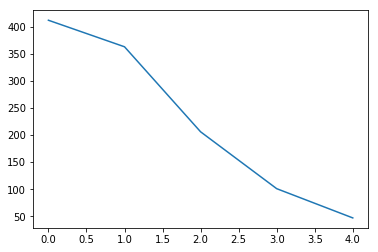

Real Percentage of gain: 55.08165035258771
Percentage of gain: 0.5522660898060867
Total gain: 624.060681480878
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 61 171]
 [ 25 154]]
0.5231143552311436
Percentile:  1
[[ 32  79]
 [ 80 172]]
0.5619834710743802
Percentile:  2
[[22 75]
 [34 75]]
0.470873786407767
Percentile:  3
[[ 0 14]
 [26 61]]
0.6039603960396039
Percentile:  4
[[47]]
1.0
000000000000000000000000000000000000000000000000
Working on... MSFT
5.843279709392834
0.0
Diff in tren train and test
0.6778686712359053
0.6292035398230088
F1,score 0.3158995815899582
G-score: 0.4058712997635785
Accuracy 0.42123893805309737
Window: 140
[[325  94]
 [560 151]]
Vol pos 1.2522124919052233
Vol neg 1.810124323173042


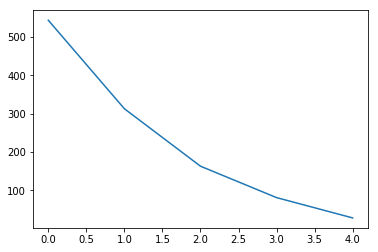

Real Percentage of gain: -21.582853330065205
Percentage of gain: -0.5201488152285692
Total gain: -587.7681612082831
000000000000000000000000000000000000000000000000
Percentile:  0
[[253  39]
 [213  39]]
0.5367647058823529
Percentile:  1
[[ 56  18]
 [183  56]]
0.35782747603833864
Percentile:  2
[[ 10  13]
 [103  37]]
0.2883435582822086
Percentile:  3
[[ 4 16]
 [47 14]]
0.2222222222222222
Percentile:  4
[[ 2  8]
 [14  4]]
0.21428571428571427
000000000000000000000000000000000000000000000000
Working on... FB
12.871078806426938
0.005182421227207363
Diff in tren train and test
0.5687789799072643
0.7676678445229682
F1,score 0.5310290652003142
G-score: 0.5397637330210784
Accuracy 0.4726148409893993
Window: 140
[[197  66]
 [531 338]]
Vol pos 3.3323659793040754
Vol neg 2.849424456702252


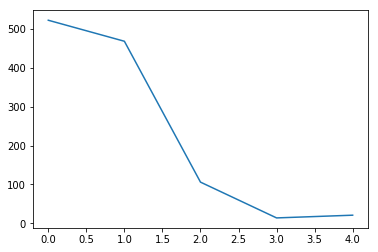

Real Percentage of gain: -69.16199900415896
Percentage of gain: 0.07218144724066773
Total gain: 81.70939827643588
000000000000000000000000000000000000000000000000
Percentile:  0
[[193  19]
 [256  54]]
0.4731800766283525
Percentile:  1
[[  3  34]
 [251 180]]
0.391025641025641
Percentile:  2
[[ 0 13]
 [24 68]]
0.6476190476190476
Percentile:  3
[[14]]
1.0
Percentile:  4
[[21]]
1.0
000000000000000000000000000000000000000000000000
Working on... INTC
6.746031746031759
0.009064539521396952
Diff in tren train and test
0.592183705012144
0.6042402826855123
F1,score 0.2370012091898428
G-score: 0.3590033515619994
Accuracy 0.44257950530035334
Window: 140
[[403  45]
 [586  98]]
Vol pos 2.6683896930891073
Vol neg 2.062003035080577


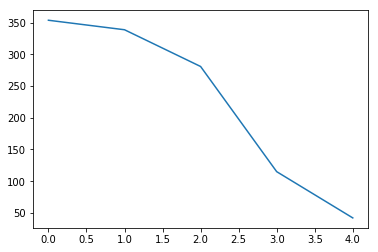

Real Percentage of gain: -61.77737145530708
Percentage of gain: 0.03157183842915073
Total gain: 35.73932110179862
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 88  28]
 [211  27]]
0.3248587570621469
Percentile:  1
[[102  12]
 [186  42]]
0.42105263157894735
Percentile:  2
[[124   3]
 [131  20]]
0.5179856115107914
Percentile:  3
[[62  1]
 [44  7]]
0.6052631578947368
Percentile:  4
[[27  1]
 [12  2]]
0.6904761904761905
000000000000000000000000000000000000000000000000
Working on... CSCO
6.455652128779988
0.0
Diff in tren train and test
0.6754775655264327
0.576
F1,score 0.0030534351145038168
G-score: 0.03903586084045342
Accuracy 0.41955555555555557
Window: 140
[[471   6]
 [647   1]]
Vol pos 2.1774799120193915
Vol neg 1.598844560027091


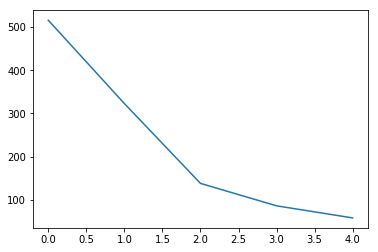

Real Percentage of gain: 10.779894379479403
Percentage of gain: -0.014466648199589044
Total gain: -16.274979224537674
000000000000000000000000000000000000000000000000
Percentile:  0
[[214   6]
 [295   1]]
0.4166666666666667
Percentile:  1
[[ 96   0]
 [227   0]]
0.29721362229102166
Percentile:  2
[[50  0]
 [88  0]]
0.36231884057971014
Percentile:  3
[[58  0]
 [28  0]]
0.6744186046511628
Percentile:  4
[[52  0]
 [ 6  0]]
0.896551724137931
000000000000000000000000000000000000000000000000
Working on... CMCSA
10.63829787234043
0.0
Diff in tren train and test
0.45605123674911663
0.5229681978798587
F1,score 0.4578947368421053
G-score: 0.4544883768422298
Accuracy 0.4540636042402827
Window: 140
[[253 287]
 [331 261]]
Vol pos 2.9254618979539115
Vol neg 2.7999590884604735


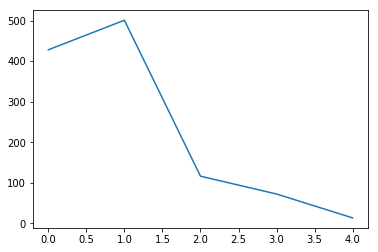

Real Percentage of gain: -42.62654010259363
Percentage of gain: -0.20025379957620315
Total gain: -226.68730112026196
000000000000000000000000000000000000000000000000
Percentile:  0
[[101 126]
 [ 94 107]]
0.48598130841121495
Percentile:  1
[[ 82 115]
 [187 117]]
0.3972055888223553
Percentile:  2
[[25 17]
 [43 31]]
0.4827586206896552
Percentile:  3
[[36 24]
 [ 6  6]]
0.5833333333333334
Percentile:  4
[[8 5]
 [0 0]]
0.6153846153846154
000000000000000000000000000000000000000000000000
Working on... NVDA
14.360220994475142
0.0
Diff in tren train and test
0.6489291234268051
0.5795053003533569
F1,score 0.5733207190160833
G-score: 0.6056361892153003
Accuracy 0.6015901060070671
Window: 140
[[378  98]
 [353 303]]
Vol pos 4.035043359037167
Vol neg 3.369192422178962


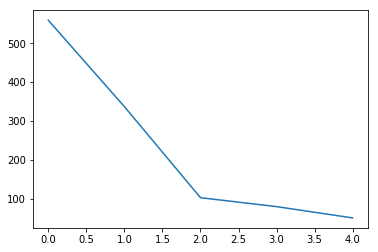

Real Percentage of gain: 257.45855348635763
Percentage of gain: 1.0851225663441686
Total gain: 1228.358745101599
000000000000000000000000000000000000000000000000
Percentile:  0
[[259  54]
 [184  62]]
0.5742397137745975
Percentile:  1
[[100  17]
 [119 101]]
0.5964391691394659
Percentile:  2
[[18 13]
 [28 44]]
0.6019417475728155
Percentile:  3
[[ 1 14]
 [ 6 59]]
0.75
Percentile:  4
[[ 0  0]
 [14 37]]
0.7254901960784313
000000000000000000000000000000000000000000000000
Working on... NFLX
14.669899702413757
0.00276273621394378
Diff in tren train and test
0.6528268551236749
0.7376325088339223
F1,score 0.3257506824385805
G-score: 0.3911767044406637
Accuracy 0.3454063604240283
Window: 140
[[212  85]
 [656 179]]
Vol pos 3.65998832590768
Vol neg 4.6937247750816


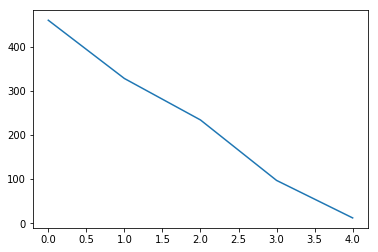

Real Percentage of gain: -235.587663735976
Percentage of gain: -1.8082991368423698
Total gain: -2046.9946229055627
000000000000000000000000000000000000000000000000
Percentile:  0
[[139  31]
 [238  52]]
0.4152173913043478
Percentile:  1
[[ 39  21]
 [205  63]]
0.31097560975609756
Percentile:  2
[[ 19  19]
 [139  56]]
0.3218884120171674
Percentile:  3
[[14 13]
 [62  8]]
0.2268041237113402
Percentile:  4
[[ 0  1]
 [11  0]]
0.0
000000000000000000000000000000000000000000000000
Working on... BKNG
3.9693863684895057
0.013598169405054938
Diff in tren train and test
0.5771643663739021
0.6708542713567839
F1,score 0.7529411764705881
G-score: 0.6626807106994538
Accuracy 0.6834170854271356
Window: 140
[[ 80  51]
 [ 75 192]]
Vol pos 1.2634377765036202
Vol neg 1.0030621138261238


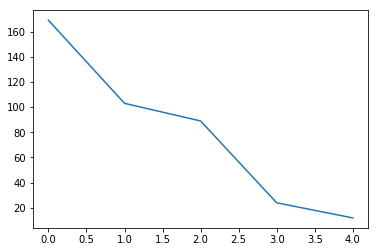

Real Percentage of gain: 140.43116025684046
Percentage of gain: 0.5459026353439526
Total gain: 217.26924886689312
000000000000000000000000000000000000000000000000
Percentile:  0
[[53 44]
 [20 55]]
0.627906976744186
Percentile:  1
[[20  6]
 [25 49]]
0.69
Percentile:  2
[[ 7  0]
 [26 56]]
0.7078651685393258
Percentile:  3
[[ 0  0]
 [ 4 19]]
0.8260869565217391
Percentile:  4
[[12]]
1.0
000000000000000000000000000000000000000000000000
Working on... ADBE
9.949148290880911
0.0
Diff in tren train and test
0.716024789729969
0.6563330380868024
F1,score 0.07081807081807083
G-score: 0.1849157406176589
Accuracy 0.3259521700620018
Window: 140
[[339  49]
 [712  29]]
Vol pos 1.7900631987733302
Vol neg 2.9967027392694447


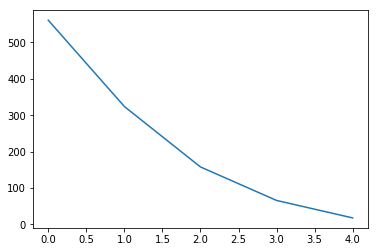

Real Percentage of gain: -272.11647165615017
Percentage of gain: -1.4364459941855288
Total gain: -1621.747527435462
000000000000000000000000000000000000000000000000
Percentile:  0
[[250  27]
 [276   8]]
0.45989304812834225
Percentile:  1
[[ 53  10]
 [240  21]]
0.22839506172839505
Percentile:  2
[[ 15  10]
 [133   0]]
0.0949367088607595
Percentile:  3
[[21  2]
 [43  0]]
0.3181818181818182
Percentile:  4
[[ 0  0]
 [18  0]]
0.0
000000000000000000000000000000000000000000000000
Working on... AMGN
6.235840507476206
0.0
Diff in tren train and test
0.5342526690391459
0.7150489759572574
F1,score 0.7525125628140703
G-score: 0.5504936650116264
Accuracy 0.649154051647373
Window: 140
[[130 190]
 [204 599]]
Vol pos 2.0328077928648716
Vol neg 1.7433319151607067


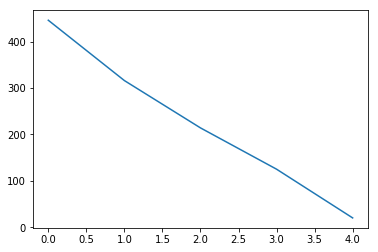

Real Percentage of gain: 182.15643077081657
Percentage of gain: 0.707964475890626
Total gain: 795.044106425173
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 41 124]
 [ 67 214]]
0.5717488789237668
Percentile:  1
[[ 34  21]
 [ 73 188]]
0.7025316455696202
Percentile:  2
[[ 21   5]
 [ 55 133]]
0.719626168224299
Percentile:  3
[[27 29]
 [ 9 60]]
0.696
Percentile:  4
[[ 6 11]
 [ 0  3]]
0.45
000000000000000000000000000000000000000000000000
Working on... TXN
8.254787181267975
0.008754267705498472
Diff in tren train and test
0.6905918727915195
0.6746242263483643
F1,score 0.591715976331361
G-score: 0.6094751120806428
Accuracy 0.5729442970822282
Window: 140
[[298  70]
 [413 350]]
Vol pos 2.282142388559051
Vol neg 2.7825499693062987


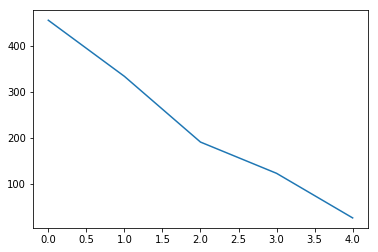

Real Percentage of gain: 39.78746121332057
Percentage of gain: 0.11923663360859661
Total gain: 134.85663261132277
000000000000000000000000000000000000000000000000
Percentile:  0
[[192  16]
 [149  98]]
0.6373626373626373
Percentile:  1
[[106  23]
 [108  97]]
0.6077844311377245
Percentile:  2
[[ 0 14]
 [96 82]]
0.4270833333333333
Percentile:  3
[[ 0 10]
 [58 54]]
0.4426229508196721
Percentile:  4
[[ 0  7]
 [ 1 18]]
0.6923076923076923
000000000000000000000000000000000000000000000000
Working on... AVGO
10.183057294555825
0.0
Diff in tren train and test
0.5048802129547472
0.639751552795031
F1,score 0.5837922895357986
G-score: 0.5363758728284751
Accuracy 0.5306122448979592
Window: 140
[[227 179]
 [350 371]]
Vol pos 3.815522090428579
Vol neg 2.508300437745688


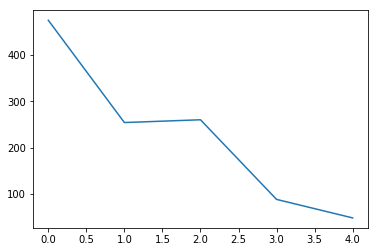

Real Percentage of gain: -29.072230481777623
Percentage of gain: 0.8471972302651476
Total gain: 954.7912785088213
000000000000000000000000000000000000000000000000
Percentile:  0
[[114  87]
 [212  62]]
0.3705263157894737
Percentile:  1
[[ 52  52]
 [ 37 113]]
0.6496062992125984
Percentile:  2
[[  8  30]
 [ 90 132]]
0.5384615384615384
Percentile:  3
[[21  4]
 [10 53]]
0.8409090909090909
Percentile:  4
[[31  6]
 [ 0 11]]
0.875
000000000000000000000000000000000000000000000000
Working on... PYPL
12.136266855926186
0.0
Diff in tren train and test
0.7039823008849557
0.7183348095659876
F1,score 0.5107011070110701
G-score: 0.40124042829943
Accuracy 0.41275465013286095
Window: 140
[[120 198]
 [465 346]]
Vol pos 3.320176691417181
Vol neg 2.62151784794375


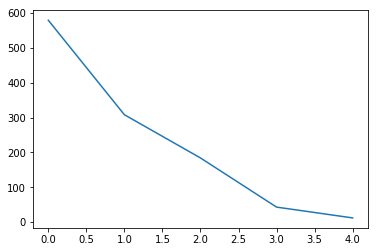

Real Percentage of gain: -165.17866420563317
Percentage of gain: -0.16905579715349886
Total gain: -190.8639949863002
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 29 105]
 [274 171]]
0.3454231433506045
Percentile:  1
[[ 20  31]
 [135 122]]
0.461038961038961
Percentile:  2
[[64 56]
 [40 24]]
0.4782608695652174
Percentile:  3
[[ 7  6]
 [15 15]]
0.5116279069767442
Percentile:  4
[[ 0  0]
 [ 1 11]]
0.9166666666666666
000000000000000000000000000000000000000000000000
Working on... GILD
12.867944909532813
0.0
Diff in tren train and test
0.4787422497785651
0.48404255319148937
F1,score 0.6854990583804144
G-score: 0.3730620025303552
Accuracy 0.5558510638297872
Window: 140
[[ 81 501]
 [  0 546]]
Vol pos 2.944564443460078
Vol neg 3.6071999743882115


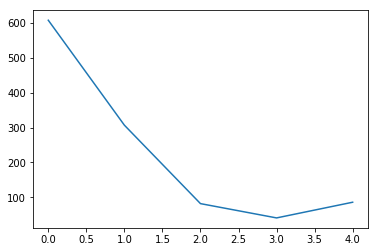

Real Percentage of gain: -158.90524464957795
Percentage of gain: 0.03460524723490701
Total gain: 39.034718880975106
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 31 308]
 [  0 269]]
0.4934210526315789
Percentile:  1
[[ 30  73]
 [  0 204]]
0.762214983713355
Percentile:  2
[[ 0 12]
 [ 0 70]]
0.8536585365853658
Percentile:  3
[[ 4 37]
 [ 0  0]]
0.0975609756097561
Percentile:  4
[[16 70]
 [ 0  0]]
0.18604651162790697
000000000000000000000000000000000000000000000000
Working on... COST
4.088465050218121
0.001175434642521966
Diff in tren train and test
0.6553559547571524
0.6583850931677019
F1,score 0.21370967741935484
G-score: 0.2990398984306814
Accuracy 0.30789707187222715
Window: 140
[[241 144]
 [636 106]]
Vol pos 1.1621989326875906
Vol neg 1.488054730350087


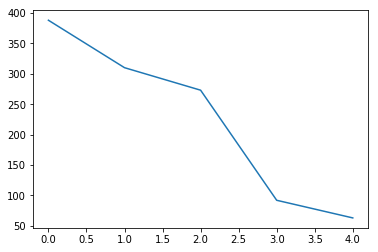

Real Percentage of gain: -178.542412332583
Percentage of gain: -0.672049387782142
Total gain: -757.399660030474
000000000000000000000000000000000000000000000000
Percentile:  0
[[121  79]
 [145  42]]
0.42118863049095606
Percentile:  1
[[ 55  49]
 [180  26]]
0.26129032258064516
Percentile:  2
[[ 55  13]
 [195  10]]
0.23809523809523808
Percentile:  3
[[ 9  3]
 [67 13]]
0.2391304347826087
Percentile:  4
[[ 0  0]
 [49 14]]
0.2222222222222222
000000000000000000000000000000000000000000000000
Working on... QCOM
11.725006748852696
0.0
Diff in tren train and test
0.47791519434628976
0.6861184792219275
F1,score 0.7127659574468086
G-score: 0.5631591696196577
Accuracy 0.6180371352785146
Window: 140
[[163 192]
 [240 536]]
Vol pos 3.670471232618907
Vol neg 2.8361109585705218


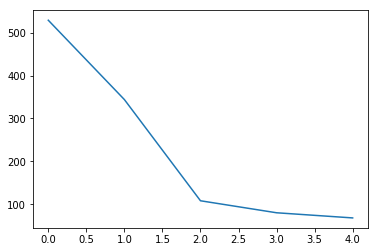

Real Percentage of gain: 99.18734957882074
Percentage of gain: 1.185198459326393
Total gain: 1340.4594574981504
000000000000000000000000000000000000000000000000
Percentile:  0
[[106 124]
 [109 190]]
0.5595463137996219
Percentile:  1
[[ 13  35]
 [ 99 197]]
0.6104651162790697
Percentile:  2
[[ 3 15]
 [10 80]]
0.7685185185185185
Percentile:  3
[[ 6  6]
 [22 46]]
0.65
Percentile:  4
[[34 12]
 [ 0 22]]
0.8235294117647058
000000000000000000000000000000000000000000000000
Mean gain over portfolio :  29.327997847279374
Real mean gain over portfolio -27.28540345807316


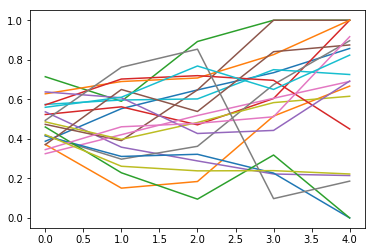

In [3]:
import warnings
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings('ignore')
o=0
accstocksresults=[]
f1stocksresults=[]
f1scoreresults=[]
aucresults=[]
chartlist=[]
gainlist=[]
pricegainlist=[]

for price in prices:
    #print('New price[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]')
    
   
    print('Working on...',files[o])
    
    senttemp=sentiment[o]
    senttemp=np.nan_to_num(np.asarray(senttemp, dtype=float))
    
    xtemp=price
    o+=1
    xtemp=np.nan_to_num(np.asarray(xtemp, dtype=float))
    
    #print(xtemp)
    accintime=[]
    trendwindowtime=[140]
    f1total=[]
    acctotal=[]
    auctotal=[]
    percfinal=[]
    f1scoretotal=[]
    percpostotal=[]
    percnegtotal=[]
    for t in trendwindowtime:
        #1
    #label because of the maket and append values without data
    #simo theroy past trend
        
        x=[]
        y=[]
        percentage=[]
        yprice=[]
        yvolatility=[]
        #print('============================================================')
        #print('Working on window:',t)
        #print(len(xtemp))
        ##QUI C E L'UNICO APPUNTO GUARDA SE CON +1 CAMBIA
        for i in range(0,len(price)-t-1):
            s=np.sign(price.iloc[i+t+1]['close']-price.iloc[i+1]['open'])
            percentage.append((100*(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))/price.iloc[i+1]['open']) 
            if(s==-1):
                y.append(0)
            else:
                y.append(1)
            yvolatility.append((100*abs(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))/price.iloc[i+1]['open'])
            yprice.append(abs(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))
            x.append(np.concatenate((senttemp[i],xtemp[i])))
        y=np.array(y)
        x=np.array(x)
        scaler = MinMaxScaler() 
        scaler.fit(x)
        MinMaxScaler(copy=True, feature_range=(0, 1))
        x=scaler.transform(x)
        
        percentage=np.array(percentage)
        permindex=range(0,len(x))
        #permindex=np.random.permutation(permindex)
        train=0.8
        nt=math.ceil(len(x)*train)
        trainvalindex=permindex[0:nt]
        testindex=permindex[nt:]
        
        yvolatility=np.array(yvolatility)
        x_tv=[]
        y_tv=[]
        x_test=[]
        y_test=[]
        x_tv=x[trainvalindex]
        y_tv=y[trainvalindex]
        x_test=x[testindex]
        y_test=y[testindex]
        yvolatilitytest=yvolatility[testindex]
        #create structure for percentile valuation
        distribution=[]
        print(max(yvolatilitytest))
        print(min(yvolatilitytest))
        step=(max(yvolatilitytest)-min(yvolatilitytest))/5
        for v in range(0,5):
            pindexes=[]
            for r in range(0,len(y_test)):
                if(yvolatilitytest[r]<min(yvolatilitytest)+step+step*v and yvolatilitytest[r]>min(yvolatilitytest)+step*v):
                    pindexes.append(r)
            distribution.append(pindexes)
    

        cspace=np.logspace(-4,4,10)
        gspace=np.logspace(-4,4,10)
        bestsvm=None
        maxacc=0
        cvacc=0
        maxg=0
        maxc=0
        #print('Model Selection...')
        #model selection
        cvacc=0
        totu=0
        for c in cspace:
            #print()
            for g in gspace:
                
                cvacclist=[]
                #faccio cross validation
                #start with 40% as train and 10% for validation and then i move in percentege
                # 0-40 40-50
                # 0-50 50-60
                # 0-60 60-70 
                #etc test set is completely external i do in some way error extimation changin the ticker
                trainpoint=math.floor(len(x_tv)*0.40)
                dimval=math.floor(trainpoint*0.25)
                endval=trainpoint+dimval
                
                for i in range(0,6):
                    #print('-----')
                    x_train=x_tv[0:trainpoint]
                    y_train=y_tv[0:trainpoint]
                    x_val=x_tv[trainpoint:endval]
                    y_val=y_tv[trainpoint:endval]
                    #print(trainpoint)
                    #print(endval)
                    #print(len(x_tv))
                    trainpoint=trainpoint+dimval
                    endval=endval+dimval
                    p=sum(y_train)/(len(y_train)-sum(y_train))
                    rbf_svm=svm.SVC(kernel='rbf',C=c,gamma=g)
                    x_train,y_train=smote(x_train,y_train)
                    rbf_svm.fit(x_train,y_train)
                    
                    
                    if(sum(y_val)+6<len(x_val) and sum(y_val)>6):
                        x_val,y_val=smote(x_val,y_val)
                    else:
                        totu=totu+1
                    prediction=rbf_svm.predict(x_val)
                    
                    cvacclist.append(geometric_mean_score(y_val, prediction))
                    
                cvacc=sum(cvacclist)/len(cvacclist)
                if(cvacc>maxacc):
                    #print(cvacc)
                    maxacc=cvacc
                    maxg=g
                    maxc=c
                    bestsvm=rbf_svm

        
        print('Diff in tren train and test')
        print(sum(y_tv)/len(y_tv))
        print(sum(y_test)/len(y_test))
        p=sum(y_tv)/(len(y_tv)-sum(y_tv))
        rbf_svm=svm.SVC(kernel='rbf',C=maxc, gamma=maxg )
        x_tv,y_tv=smote(x_tv,y_tv)
        rbf_svm.fit(x_tv,y_tv)
        prediction=rbf_svm.predict(x_test)
        volr=[]
        voln=[]
        pricegain=0
        for j in range(0,len(x_test)):
            if(y_test[j]==prediction[j]):
                volr.append(yvolatilitytest[j])
                pricegain=pricegain+yprice[j]
            else:
                voln.append(yvolatilitytest[j])
                pricegain=pricegain-yprice[j]
        confmatrix=confusion_matrix(y_test, prediction)
        CM = f1_score(y_test, prediction)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction)
        auc=metrics.auc(fpr, tpr)
        valueacc=geometric_mean_score(y_test, prediction)
        
        
        print('F1,score',CM)
        print('G-score:',valueacc)
        realacc=rbf_svm.score(x_test,y_test)
        print('Accuracy',realacc)
        print('Window:',t)
        print(confmatrix)
        print('Vol pos',sum(volr)/len(volr))
        print('Vol neg',sum(voln)/len(voln))
        percnegtotal.append(sum(volr)/len(volr))
        percpostotal.append(sum(voln)/len(voln))
        #build structure to plot distribution onver percentile
        chart=np.zeros(5)
        for r in range(0,len(y_test)):
            for v in range(0,5):
                if(yvolatilitytest[r]<min(yvolatility)+step+step*v and yvolatilitytest[r]>min(yvolatility)+step*v):
                    chart[v]+=1
        plt.plot(chart)
        plt.show()
        print('Real Percentage of gain:',(pricegain*100)/(sum(price.iloc[1:6]['open'])))
        pricegainlist.append((pricegain*100)/(sum(price.iloc[1:6]['open'])))
        print('Percentage of gain:',(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('Total gain:',len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        gainlist.append(len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('000000000000000000000000000000000000000000000000')
        #performances for each percentile
        chartscore=[]
        for g in range(0,len(distribution)):
            print('Percentile: ',g)
            tempscore=0
            if(len(distribution[g])>0):
                predictionp=rbf_svm.predict(x_test[distribution[g]])
                print(confusion_matrix(y_test[distribution[g]], predictionp))
                print(rbf_svm.score(x_test[distribution[g]],y_test[distribution[g]]))
                tempscore=rbf_svm.score(x_test[distribution[g]],y_test[distribution[g]])
            chartscore.append(tempscore)    
        chartlist.append(chartscore)
        print('000000000000000000000000000000000000000000000000')
print('Mean gain over portfolio : ', sum(gainlist)/len(gainlist))
print('Real mean gain over portfolio',sum(pricegainlist)/len(pricegainlist))
#print all the accuracy varing the percentile
for st in range(0,len(chartlist)):
    plt.plot(chartlist[st])
plt.show()
        
        
        

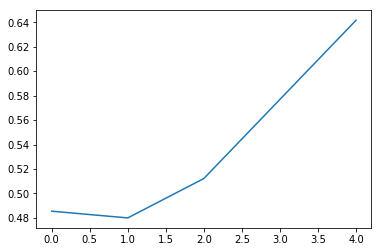

In [4]:
tot=np.zeros(5)
for st in range(0,len(chartlist)):
    tot=chartlist[st]+tot
    
tot=tot/20
plt.plot(tot)
plt.show()

Working on... AAPL
15.571701720841297
0.005338458253266777
Diff in tren train and test
0.5490716180371353
0.552212389380531
F1,score 0.5860655737704917
G-score: 0.35927160610953063
Accuracy 0.46371681415929206
Window: 140
[[ 95 411]
 [195 429]]
Vol pos 4.159498671499145
Vol neg 2.3220480498952436


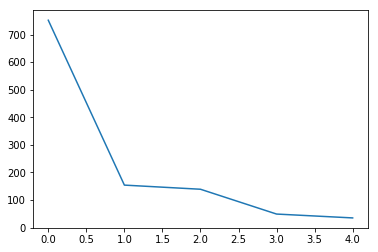

Real Percentage of gain: -42.06392383030607
Percentage of gain: 0.6835541465743669
Total gain: 772.4161856290345
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 39 339]
 [130 245]]
0.37715803452855245
Percentile:  1
[[18 50]
 [19 65]]
0.5460526315789473
Percentile:  2
[[38 22]
 [27 52]]
0.6474820143884892
Percentile:  3
[[ 0  0]
 [14 35]]
0.7142857142857143
Percentile:  4
[[ 0  0]
 [ 5 30]]
0.8571428571428571
000000000000000000000000000000000000000000000000
Working on... AMZN
11.150617492631287
0.0007590184265374819
Diff in tren train and test
0.6817579505300353
0.7782685512367491
F1,score 0.2765567765567766
G-score: 0.36114394875928324
Accuracy 0.30212014134275617
Window: 140
[[191  60]
 [730 151]]
Vol pos 2.258430195054872
Vol neg 2.4081868130267337


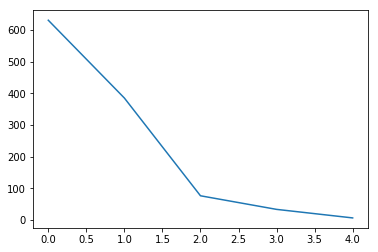

Real Percentage of gain: -153.80922270319928
Percentage of gain: -0.9983078229526091
Total gain: -1130.0844555823535
000000000000000000000000000000000000000000000000
Percentile:  0
[[175  24]
 [369  62]]
0.3761904761904762
Percentile:  1
[[ 11  25]
 [296  53]]
0.16623376623376623
Percentile:  2
[[ 5 11]
 [49 11]]
0.21052631578947367
Percentile:  3
[[ 0  0]
 [14 19]]
0.5757575757575758
Percentile:  4
[[0 0]
 [2 4]]
0.6666666666666666
000000000000000000000000000000000000000000000000
Working on... PEP
5.495274763738178
0.0
Diff in tren train and test
0.3288564850345357
0.8602150537634409
F1,score 0.8568683957732949
G-score: 0.7000784885353143
Accuracy 0.7711213517665131
Window: 140
[[ 56  35]
 [114 446]]
Vol pos 2.3217698461707097
Vol neg 1.2758618771348802


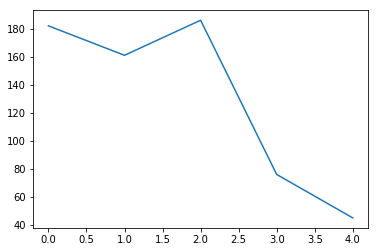

Real Percentage of gain: 99.70624439897885
Percentage of gain: 1.4983487604986159
Total gain: 975.425043084599
000000000000000000000000000000000000000000000000
Percentile:  0
[[42 30]
 [26 84]]
0.6923076923076923
Percentile:  1
[[14  5]
 [66 76]]
0.5590062111801242
Percentile:  2
[[  0   0]
 [ 21 165]]
0.8870967741935484
Percentile:  3
[[76]]
1.0
Percentile:  4
[[45]]
1.0
000000000000000000000000000000000000000000000000
Working on... GOOGL
9.280622946926826
0.003477111910863453
Diff in tren train and test
0.6279840848806366
0.5973451327433629
F1,score 0.6671061305207647
G-score: 0.4427832201619434
Accuracy 0.5530973451327433
Window: 140
[[119 336]
 [169 506]]
Vol pos 3.1362742829656245
Vol neg 2.7313046745047997


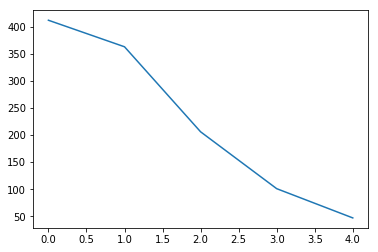

Real Percentage of gain: 52.49850665276466
Percentage of gain: 0.5140376692288421
Total gain: 580.8625662285915
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 65 167]
 [ 26 153]]
0.5304136253041363
Percentile:  1
[[ 30  81]
 [ 78 174]]
0.5619834710743802
Percentile:  2
[[23 74]
 [36 73]]
0.46601941747572817
Percentile:  3
[[ 0 14]
 [29 58]]
0.5742574257425742
Percentile:  4
[[47]]
1.0
000000000000000000000000000000000000000000000000
Working on... MSFT
5.843279709392834
0.0
Diff in tren train and test
0.6778686712359053
0.6292035398230088
F1,score 0.3173277661795408
G-score: 0.406586062496897
Accuracy 0.42123893805309737
Window: 140
[[324  95]
 [559 152]]
Vol pos 1.2700747786191984
Vol neg 1.7971236374301491


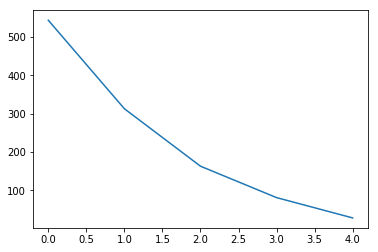

Real Percentage of gain: -23.612838215068667
Percentage of gain: -0.5051002338553797
Total gain: -570.7632642565791
000000000000000000000000000000000000000000000000
Percentile:  0
[[252  40]
 [216  36]]
0.5294117647058824
Percentile:  1
[[ 56  18]
 [181  58]]
0.36421725239616615
Percentile:  2
[[ 10  13]
 [102  38]]
0.294478527607362
Percentile:  3
[[ 4 16]
 [48 13]]
0.20987654320987653
Percentile:  4
[[ 2  8]
 [12  6]]
0.2857142857142857
000000000000000000000000000000000000000000000000
Working on... FB
12.871078806426938
0.005182421227207363
Diff in tren train and test
0.5687789799072643
0.7676678445229682
F1,score 0.5235849056603773
G-score: 0.5302894765979576
Accuracy 0.46466431095406363
Window: 140
[[193  70]
 [536 333]]
Vol pos 3.358547729670004
Vol neg 2.833871441868816


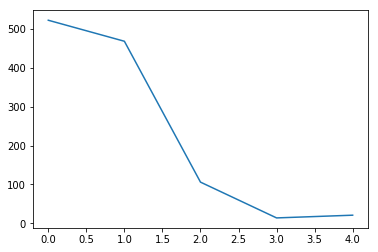

Real Percentage of gain: -72.04016308484235
Percentage of gain: 0.04352474561300334
Total gain: 49.270012033919784
000000000000000000000000000000000000000000000000
Percentile:  0
[[189  23]
 [257  53]]
0.46360153256704983
Percentile:  1
[[  3  34]
 [255 176]]
0.38247863247863245
Percentile:  2
[[ 0 13]
 [24 68]]
0.6476190476190476
Percentile:  3
[[14]]
1.0
Percentile:  4
[[21]]
1.0
000000000000000000000000000000000000000000000000
Working on... INTC
6.746031746031759
0.009064539521396952
Diff in tren train and test
0.592183705012144
0.6042402826855123
F1,score 0.22576687116564417
G-score: 0.3504196970446422
Accuracy 0.44257950530035334
Window: 140
[[409  39]
 [592  92]]
Vol pos 2.66133897382093
Vol neg 2.067601149745167


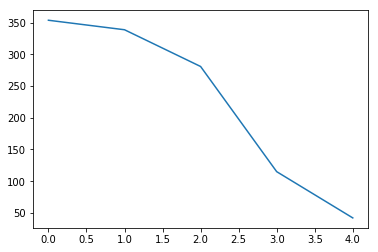

Real Percentage of gain: -63.471750871604144
Percentage of gain: 0.025330830737707827
Total gain: 28.67450039508526
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 91  25]
 [213  25]]
0.327683615819209
Percentile:  1
[[105   9]
 [189  39]]
0.42105263157894735
Percentile:  2
[[124   3]
 [132  19]]
0.5143884892086331
Percentile:  3
[[62  1]
 [44  7]]
0.6052631578947368
Percentile:  4
[[27  1]
 [12  2]]
0.6904761904761905
000000000000000000000000000000000000000000000000
Working on... CSCO
6.455652128779988
0.0
Diff in tren train and test
0.6754775655264327
0.576
F1,score 0.0
G-score: 0.0
Accuracy 0.4231111111111111
Window: 140
[[476   1]
 [648   0]]
Vol pos 2.168887878813392
Vol neg 1.6015799473893204


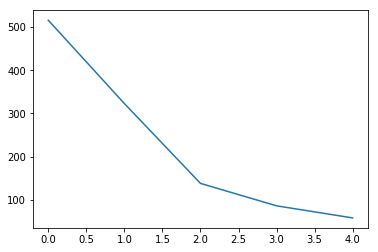

Real Percentage of gain: 13.378913617502798
Percentage of gain: -0.006253116035995036
Total gain: -7.034755540494416
000000000000000000000000000000000000000000000000
Percentile:  0
[[219   1]
 [296   0]]
0.42441860465116277
Percentile:  1
[[ 96   0]
 [227   0]]
0.29721362229102166
Percentile:  2
[[50  0]
 [88  0]]
0.36231884057971014
Percentile:  3
[[58  0]
 [28  0]]
0.6744186046511628
Percentile:  4
[[52  0]
 [ 6  0]]
0.896551724137931
000000000000000000000000000000000000000000000000
Working on... CMCSA
10.63829787234043
0.0
Diff in tren train and test
0.45605123674911663
0.5229681978798587
F1,score 0.4793070259865255
G-score: 0.5161251157763349
Accuracy 0.5220848056537103
Window: 140
[[342 198]
 [343 249]]
Vol pos 3.2041243235858055
Vol neg 2.4776795877590985


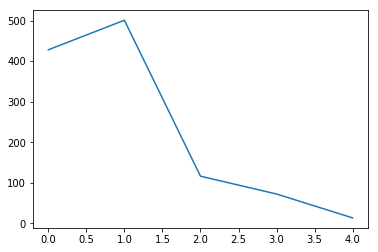

Real Percentage of gain: 47.4387554532816
Percentage of gain: 0.48870390305789646
Total gain: 553.2128182615388
000000000000000000000000000000000000000000000000
Percentile:  0
[[138  89]
 [140  61]]
0.4649532710280374
Percentile:  1
[[109  88]
 [167 137]]
0.49101796407185627
Percentile:  2
[[34  8]
 [27 47]]
0.6982758620689655
Percentile:  3
[[50 10]
 [ 8  4]]
0.75
Percentile:  4
[[10  3]
 [ 0  0]]
0.7692307692307693
000000000000000000000000000000000000000000000000
Working on... NVDA
14.360220994475142
0.0
Diff in tren train and test
0.6489291234268051
0.5795053003533569
F1,score 0.5681818181818182
G-score: 0.6010341569318081
Accuracy 0.5971731448763251
Window: 140
[[376 100]
 [356 300]]
Vol pos 4.041089008021932
Vol neg 3.367531009833764


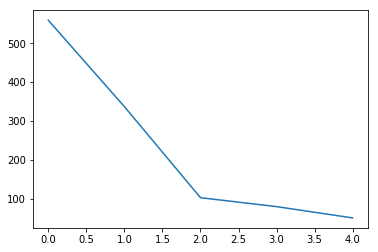

Real Percentage of gain: 244.65506403514166
Percentage of gain: 1.0566979054228176
Total gain: 1196.1820289386296
000000000000000000000000000000000000000000000000
Percentile:  0
[[256  57]
 [184  62]]
0.5688729874776386
Percentile:  1
[[101  16]
 [123  97]]
0.5875370919881305
Percentile:  2
[[18 13]
 [26 46]]
0.6213592233009708
Percentile:  3
[[ 1 14]
 [ 7 58]]
0.7375
Percentile:  4
[[ 0  0]
 [14 37]]
0.7254901960784313
000000000000000000000000000000000000000000000000
Working on... NFLX
14.669899702413757
0.00276273621394378
Diff in tren train and test
0.6528268551236749
0.7376325088339223
F1,score 0.317722681359045
G-score: 0.38817580716382055
Accuracy 0.34363957597173145
Window: 140
[[216  81]
 [662 173]]
Vol pos 3.67961037079386
Vol neg 4.68066898994153


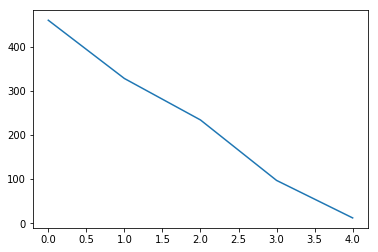

Real Percentage of gain: -240.8654950727011
Percentage of gain: -1.8077461354132027
Total gain: -2046.3686252877458
000000000000000000000000000000000000000000000000
Percentile:  0
[[139  31]
 [240  50]]
0.4108695652173913
Percentile:  1
[[ 41  19]
 [207  61]]
0.31097560975609756
Percentile:  2
[[ 21  17]
 [141  54]]
0.3218884120171674
Percentile:  3
[[14 13]
 [62  8]]
0.2268041237113402
Percentile:  4
[[ 0  1]
 [11  0]]
0.0
000000000000000000000000000000000000000000000000
Working on... BKNG
3.9693863684895057
0.013598169405054938
Diff in tren train and test
0.5771643663739021
0.6708542713567839
F1,score 0.7689243027888445
G-score: 0.7007810981916516
Accuracy 0.7085427135678392
Window: 140
[[ 89  42]
 [ 74 193]]
Vol pos 1.2415761741097788
Vol neg 1.0337622452768869


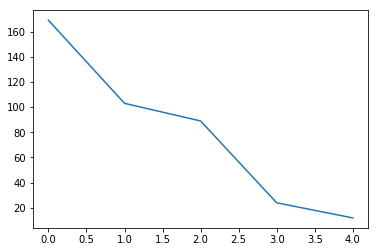

Real Percentage of gain: 154.72507902760782
Percentage of gain: 0.5784122126804994
Total gain: 230.20806064683876
000000000000000000000000000000000000000000000000
Percentile:  0
[[61 36]
 [18 57]]
0.686046511627907
Percentile:  1
[[21  5]
 [25 49]]
0.7
Percentile:  2
[[ 7  0]
 [27 55]]
0.6966292134831461
Percentile:  3
[[ 0  0]
 [ 4 19]]
0.8260869565217391
Percentile:  4
[[12]]
1.0
000000000000000000000000000000000000000000000000
Working on... ADBE
9.949148290880911
0.0
Diff in tren train and test
0.716024789729969
0.6563330380868024
F1,score 0.06585365853658535
G-score: 0.17763418755127855
Accuracy 0.32152347209920284
Window: 140
[[336  52]
 [714  27]]
Vol pos 1.7714767721235758
Vol neg 2.997634430093699


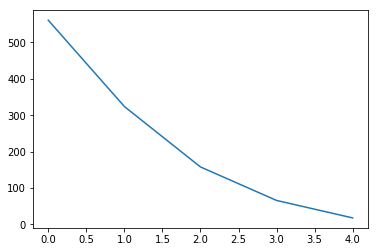

Real Percentage of gain: -274.7466885837957
Percentage of gain: -1.4642532375295974
Total gain: -1653.1419051709154
000000000000000000000000000000000000000000000000
Percentile:  0
[[251  26]
 [276   8]]
0.46167557932263814
Percentile:  1
[[ 50  13]
 [242  19]]
0.21296296296296297
Percentile:  2
[[ 14  11]
 [133   0]]
0.08860759493670886
Percentile:  3
[[21  2]
 [43  0]]
0.3181818181818182
Percentile:  4
[[ 0  0]
 [18  0]]
0.0
000000000000000000000000000000000000000000000000
Working on... AMGN
6.235840507476206
0.0
Diff in tren train and test
0.5342526690391459
0.7150489759572574
F1,score 0.7536231884057971
G-score: 0.5584319132566314
Accuracy 0.6518254674977738
Window: 140
[[134 186]
 [205 598]]
Vol pos 2.0380098941623364
Vol neg 1.7313719003707921


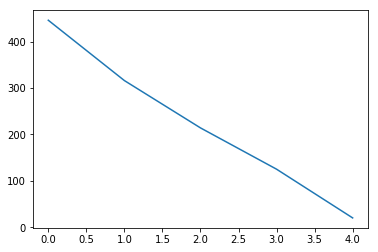

Real Percentage of gain: 184.41970042480233
Percentage of gain: 0.725607150028362
Total gain: 814.8568294818505
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 44 121]
 [ 68 213]]
0.5762331838565022
Percentile:  1
[[ 35  20]
 [ 74 187]]
0.7025316455696202
Percentile:  2
[[ 21   5]
 [ 55 133]]
0.719626168224299
Percentile:  3
[[27 29]
 [ 8 61]]
0.704
Percentile:  4
[[ 6 11]
 [ 0  3]]
0.45
000000000000000000000000000000000000000000000000
Working on... TXN
8.254787181267975
0.008754267705498472
Diff in tren train and test
0.6905918727915195
0.6746242263483643
F1,score 0.5494880546075086
G-score: 0.5676686590098298
Accuracy 0.53315649867374
Window: 140
[[281  87]
 [441 322]]
Vol pos 2.344396569223058
Vol neg 2.6688044918933778


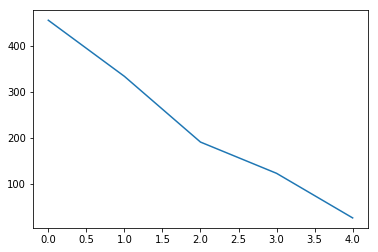

Real Percentage of gain: 0.5018690903759558
Percentage of gain: 0.00401623299893949
Total gain: 4.542359521800563
000000000000000000000000000000000000000000000000
Percentile:  0
[[170  38]
 [153  94]]
0.5802197802197803
Percentile:  1
[[101  28]
 [117  88]]
0.5658682634730539
Percentile:  2
[[  4  10]
 [110  68]]
0.375
Percentile:  3
[[ 3  7]
 [59 53]]
0.45901639344262296
Percentile:  4
[[ 3  4]
 [ 2 17]]
0.7692307692307693
000000000000000000000000000000000000000000000000
Working on... AVGO
10.183057294555825
0.0
Diff in tren train and test
0.5048802129547472
0.639751552795031
F1,score 0.5743670886075949
G-score: 0.5293914012979364
Accuracy 0.5226264418811003
Window: 140
[[226 180]
 [358 363]]
Vol pos 3.803084863405682
Vol neg 2.5437846786204696


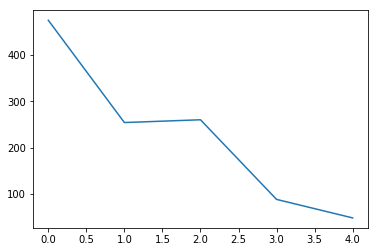

Real Percentage of gain: -36.448467071161645
Percentage of gain: 0.7732571672121864
Total gain: 871.4608274481341
000000000000000000000000000000000000000000000000
Percentile:  0
[[114  87]
 [212  62]]
0.3705263157894737
Percentile:  1
[[ 52  52]
 [ 40 110]]
0.6377952755905512
Percentile:  2
[[  7  31]
 [ 95 127]]
0.5153846153846153
Percentile:  3
[[21  4]
 [10 53]]
0.8409090909090909
Percentile:  4
[[31  6]
 [ 0 11]]
0.875
000000000000000000000000000000000000000000000000
Working on... PYPL
12.136266855926186
0.0
Diff in tren train and test
0.7039823008849557
0.7183348095659876
F1,score 0.6947923533289387
G-score: 0.5329527661430408
Accuracy 0.5899025686448184
Window: 140
[[139 179]
 [284 527]]
Vol pos 2.8789355140137274
Vol neg 2.9544225033563096


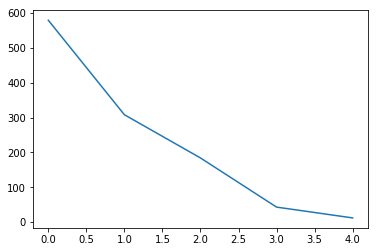

Real Percentage of gain: 109.83022286026795
Percentage of gain: 0.48669037491512057
Total gain: 549.4734332791711
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 52  82]
 [148 297]]
0.6027633851468048
Percentile:  1
[[ 27  24]
 [109 148]]
0.5681818181818182
Percentile:  2
[[56 64]
 [13 51]]
0.5815217391304348
Percentile:  3
[[ 4  9]
 [13 17]]
0.4883720930232558
Percentile:  4
[[ 0  0]
 [ 1 11]]
0.9166666666666666
000000000000000000000000000000000000000000000000
Working on... GILD
12.867944909532813
0.0
Diff in tren train and test
0.4787422497785651
0.48404255319148937
F1,score 0.684639498432602
G-score: 0.36842751202254187
Accuracy 0.5540780141843972
Window: 140
[[ 79 503]
 [  0 546]]
Vol pos 2.9523016590682127
Vol neg 3.5949514041756063


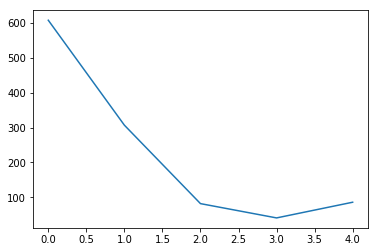

Real Percentage of gain: -161.99324157257035
Percentage of gain: 0.03273757146924033
Total gain: 36.92798061730309
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 29 310]
 [  0 269]]
0.4901315789473684
Percentile:  1
[[ 30  73]
 [  0 204]]
0.762214983713355
Percentile:  2
[[ 0 12]
 [ 0 70]]
0.8536585365853658
Percentile:  3
[[ 4 37]
 [ 0  0]]
0.0975609756097561
Percentile:  4
[[16 70]
 [ 0  0]]
0.18604651162790697
000000000000000000000000000000000000000000000000
Working on... COST
4.088465050218121
0.001175434642521966
Diff in tren train and test
0.6553559547571524
0.6583850931677019
F1,score 0.21105527638190952
G-score: 0.29514573045419756
Accuracy 0.3034605146406389
Window: 140
[[237 148]
 [637 105]]
Vol pos 1.164123643615231
Vol neg 1.4851406792347166


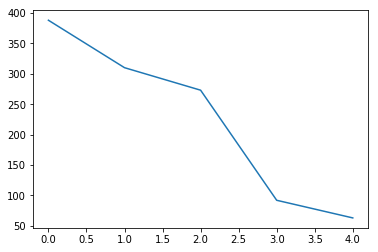

Real Percentage of gain: -187.4036580557358
Percentage of gain: -0.6811935644035878
Total gain: -767.7051470828435
000000000000000000000000000000000000000000000000
Percentile:  0
[[118  82]
 [145  42]]
0.4134366925064599
Percentile:  1
[[ 55  49]
 [181  25]]
0.25806451612903225
Percentile:  2
[[ 54  14]
 [194  11]]
0.23809523809523808
Percentile:  3
[[ 9  3]
 [68 12]]
0.22826086956521738
Percentile:  4
[[ 0  0]
 [49 14]]
0.2222222222222222
000000000000000000000000000000000000000000000000
Working on... QCOM
11.725006748852696
0.0
Diff in tren train and test
0.47791519434628976
0.6861184792219275
F1,score 0.6373467916366257
G-score: 0.5462891432949161
Accuracy 0.5552608311229
Window: 140
[[186 169]
 [334 442]]
Vol pos 3.8640572099528088
Vol neg 2.7121896577588793


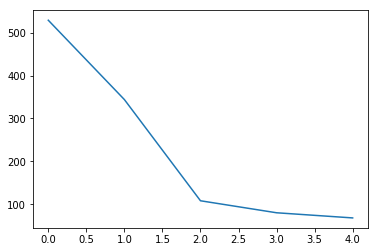

Real Percentage of gain: 43.346946450060074
Percentage of gain: 0.939342643676081
Total gain: 1062.3965299976476
000000000000000000000000000000000000000000000000
Percentile:  0
[[109 121]
 [149 150]]
0.4896030245746692
Percentile:  1
[[ 19  29]
 [144 152]]
0.49709302325581395
Percentile:  2
[[ 8 10]
 [23 67]]
0.6944444444444444
Percentile:  3
[[12  0]
 [18 50]]
0.775
Percentile:  4
[[38  8]
 [ 0 22]]
0.8823529411764706
000000000000000000000000000000000000000000000000
Mean gain over portfolio :  77.5405511321606
Real mean gain over portfolio -15.29770735251007


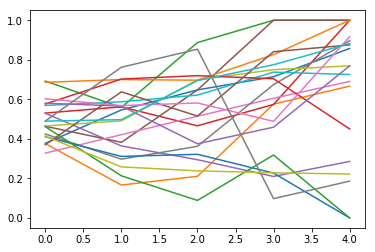

In [5]:
import warnings
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings('ignore')
o=0
accstocksresults=[]
f1stocksresults=[]
f1scoreresults=[]
aucresults=[]
chartlist=[]
gainlist=[]
pricegainlist=[]

for price in prices:
    #print('New price[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]')
    
   
    print('Working on...',files[o])
    
    senttemp=sentiment[o]
    senttemp=np.nan_to_num(np.asarray(senttemp, dtype=float))
    
    xtemp=price
    o+=1
    xtemp=np.nan_to_num(np.asarray(xtemp, dtype=float))
    
    #print(xtemp)
    accintime=[]
    trendwindowtime=[140]
    f1total=[]
    acctotal=[]
    auctotal=[]
    percfinal=[]
    f1scoretotal=[]
    percpostotal=[]
    percnegtotal=[]
    for t in trendwindowtime:
        #1
    #label because of the maket and append values without data
    #simo theroy past trend
        
        x=[]
        y=[]
        percentage=[]
        yprice=[]
        yvolatility=[]
        #print('============================================================')
        #print('Working on window:',t)
        #print(len(xtemp))
        ##QUI C E L'UNICO APPUNTO GUARDA SE CON +1 CAMBIA
        for i in range(0,len(price)-t-1):
            s=np.sign(price.iloc[i+t+1]['close']-price.iloc[i+1]['open'])
            percentage.append((100*(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))/price.iloc[i+1]['open']) 
            if(s==-1):
                y.append(0)
            else:
                y.append(1)
            yvolatility.append((100*abs(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))/price.iloc[i+1]['open'])
            yprice.append(abs(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))
            x.append(np.concatenate((senttemp[i],xtemp[i])))
        y=np.array(y)
        x=np.array(x)
        scaler = MinMaxScaler() 
        scaler.fit(x)
        MinMaxScaler(copy=True, feature_range=(0, 1))
        x=scaler.transform(x)
        
        percentage=np.array(percentage)
        permindex=range(0,len(x))
        #permindex=np.random.permutation(permindex)
        train=0.8
        nt=math.ceil(len(x)*train)
        trainvalindex=permindex[0:nt]
        testindex=permindex[nt:]
        
        yvolatility=np.array(yvolatility)
        x_tv=[]
        y_tv=[]
        x_test=[]
        y_test=[]
        x_tv=x[trainvalindex]
        y_tv=y[trainvalindex]
        x_test=x[testindex]
        y_test=y[testindex]
        yvolatilitytest=yvolatility[testindex]
        #create structure for percentile valuation
        distribution=[]
        print(max(yvolatilitytest))
        print(min(yvolatilitytest))
        step=(max(yvolatilitytest)-min(yvolatilitytest))/5
        for v in range(0,5):
            pindexes=[]
            for r in range(0,len(y_test)):
                if(yvolatilitytest[r]<min(yvolatilitytest)+step+step*v and yvolatilitytest[r]>min(yvolatilitytest)+step*v):
                    pindexes.append(r)
            distribution.append(pindexes)
    

        cspace=np.logspace(-4,4,10)
        gspace=np.logspace(-4,4,10)
        bestsvm=None
        maxacc=0
        cvacc=0
        maxg=0
        maxc=0
        #print('Model Selection...')
        #model selection
        cvacc=0
        totu=0
        for c in cspace:
            #print()
            for g in gspace:
                
                cvacclist=[]
                #faccio cross validation
                #start with 40% as train and 10% for validation and then i move in percentege
                # 0-40 40-50
                # 0-50 50-60
                # 0-60 60-70 
                #etc test set is completely external i do in some way error extimation changin the ticker
                trainpoint=math.floor(len(x_tv)*0.40)
                dimval=math.floor(trainpoint*0.25)
                endval=trainpoint+dimval
                
                for i in range(0,6):
                    #print('-----')
                    x_train=x_tv[0:trainpoint]
                    y_train=y_tv[0:trainpoint]
                    x_val=x_tv[trainpoint:endval]
                    y_val=y_tv[trainpoint:endval]
                    #print(trainpoint)
                    #print(endval)
                    #print(len(x_tv))
                    trainpoint=trainpoint+dimval
                    endval=endval+dimval
                    p=sum(y_train)/(len(y_train)-sum(y_train))
                    rbf_svm=svm.SVC(kernel='rbf',C=c,gamma=g)
                    x_train,y_train=smote(x_train,y_train)
                    rbf_svm.fit(x_train,y_train)
                    
                    
                    if(sum(y_val)+6<len(x_val) and sum(y_val)>6):
                        x_val,y_val=smote(x_val,y_val)
                    else:
                        totu=totu+1
                    prediction=rbf_svm.predict(x_val)
                    
                    cvacclist.append(geometric_mean_score(y_val, prediction))
                    
                cvacc=sum(cvacclist)/len(cvacclist)
                if(cvacc>maxacc):
                    #print(cvacc)
                    maxacc=cvacc
                    maxg=g
                    maxc=c
                    bestsvm=rbf_svm

        
        print('Diff in tren train and test')
        print(sum(y_tv)/len(y_tv))
        print(sum(y_test)/len(y_test))
        p=sum(y_tv)/(len(y_tv)-sum(y_tv))
        rbf_svm=svm.SVC(kernel='rbf',C=maxc, gamma=maxg )
        x_tv,y_tv=smote(x_tv,y_tv)
        rbf_svm.fit(x_tv,y_tv)
        prediction=rbf_svm.predict(x_test)
        volr=[]
        voln=[]
        pricegain=0
        for j in range(0,len(x_test)):
            if(y_test[j]==prediction[j]):
                volr.append(yvolatilitytest[j])
                pricegain=pricegain+yprice[j]
            else:
                voln.append(yvolatilitytest[j])
                pricegain=pricegain-yprice[j]
        confmatrix=confusion_matrix(y_test, prediction)
        CM = f1_score(y_test, prediction)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction)
        auc=metrics.auc(fpr, tpr)
        valueacc=geometric_mean_score(y_test, prediction)
        
        
        print('F1,score',CM)
        print('G-score:',valueacc)
        realacc=rbf_svm.score(x_test,y_test)
        print('Accuracy',realacc)
        print('Window:',t)
        print(confmatrix)
        print('Vol pos',sum(volr)/len(volr))
        print('Vol neg',sum(voln)/len(voln))
        percnegtotal.append(sum(volr)/len(volr))
        percpostotal.append(sum(voln)/len(voln))
        #build structure to plot distribution onver percentile
        chart=np.zeros(5)
        for r in range(0,len(y_test)):
            for v in range(0,5):
                if(yvolatilitytest[r]<min(yvolatility)+step+step*v and yvolatilitytest[r]>min(yvolatility)+step*v):
                    chart[v]+=1
        plt.plot(chart)
        plt.show()
        print('Real Percentage of gain:',(pricegain*100)/(sum(price.iloc[1:6]['open'])))
        pricegainlist.append((pricegain*100)/(sum(price.iloc[1:6]['open'])))
        print('Percentage of gain:',(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('Total gain:',len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        gainlist.append(len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('000000000000000000000000000000000000000000000000')
        #performances for each percentile
        chartscore=[]
        for g in range(0,len(distribution)):
            print('Percentile: ',g)
            tempscore=0
            if(len(distribution[g])>0):
                predictionp=rbf_svm.predict(x_test[distribution[g]])
                print(confusion_matrix(y_test[distribution[g]], predictionp))
                print(rbf_svm.score(x_test[distribution[g]],y_test[distribution[g]]))
                tempscore=rbf_svm.score(x_test[distribution[g]],y_test[distribution[g]])
            chartscore.append(tempscore)    
        chartlist.append(chartscore)
        print('000000000000000000000000000000000000000000000000')
print('Mean gain over portfolio : ', sum(gainlist)/len(gainlist))
print('Real mean gain over portfolio',sum(pricegainlist)/len(pricegainlist))
#print all the accuracy varing the percentile
for st in range(0,len(chartlist)):
    plt.plot(chartlist[st])
plt.show()
        
        
        

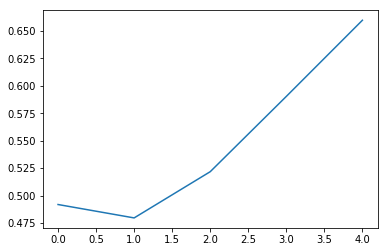

In [6]:
tot=np.zeros(5)
for st in range(0,len(chartlist)):
    tot=chartlist[st]+tot
    
tot=tot/20
plt.plot(tot)
plt.show()

Working on... AAPL
15.571701720841297
0.005338458253266777
Diff in tren train and test
0.5490716180371353
0.552212389380531
F1,score 0.5943012211668927
G-score: 0.3611049392294538
Accuracy 0.47079646017699117
Window: 140
[[ 94 412]
 [186 438]]
Vol pos 4.126721620545049
Vol neg 2.3266262875787684


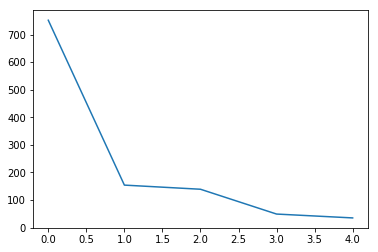

Real Percentage of gain: -32.31384935950082
Percentage of gain: 0.7115870638565156
Total gain: 804.0933821578626
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 39 339]
 [123 252]]
0.38645418326693226
Percentile:  1
[[18 50]
 [18 66]]
0.5526315789473685
Percentile:  2
[[37 23]
 [27 52]]
0.6402877697841727
Percentile:  3
[[ 0  0]
 [14 35]]
0.7142857142857143
Percentile:  4
[[ 0  0]
 [ 4 31]]
0.8857142857142857
000000000000000000000000000000000000000000000000
Working on... AMZN
11.150617492631287
0.0007590184265374819
Diff in tren train and test
0.6817579505300353
0.7782685512367491
F1,score 0.31700801424755115
G-score: 0.3879770079557649
Accuracy 0.3224381625441696
Window: 140
[[187  64]
 [703 178]]
Vol pos 2.4118649611813026
Vol neg 2.339661014561554


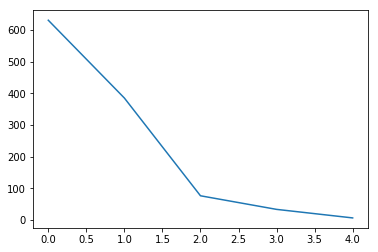

Real Percentage of gain: -144.68895954578755
Percentage of gain: -0.8075877096621347
Total gain: -914.1892873375365
000000000000000000000000000000000000000000000000
Percentile:  0
[[176  23]
 [377  54]]
0.36507936507936506
Percentile:  1
[[ 11  25]
 [269  80]]
0.23636363636363636
Percentile:  2
[[ 0 16]
 [47 13]]
0.17105263157894737
Percentile:  3
[[ 0  0]
 [ 9 24]]
0.7272727272727273
Percentile:  4
[[0 0]
 [1 5]]
0.8333333333333334
000000000000000000000000000000000000000000000000
Working on... PEP
5.495274763738178
0.0
Diff in tren train and test
0.3288564850345357
0.8602150537634409
F1,score 0.875717017208413
G-score: 0.7524684652587051
Accuracy 0.8003072196620584
Window: 140
[[ 63  28]
 [102 458]]
Vol pos 2.2799200333396494
Vol neg 1.2907195776987344


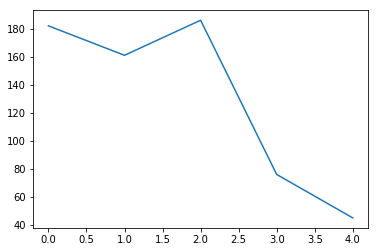

Real Percentage of gain: 111.77029471939947
Percentage of gain: 1.5668890818266081
Total gain: 1020.0447922691219
000000000000000000000000000000000000000000000000
Percentile:  0
[[47 25]
 [26 84]]
0.7197802197802198
Percentile:  1
[[16  3]
 [54 88]]
0.6459627329192547
Percentile:  2
[[  0   0]
 [ 21 165]]
0.8870967741935484
Percentile:  3
[[76]]
1.0
Percentile:  4
[[45]]
1.0
000000000000000000000000000000000000000000000000
Working on... GOOGL
9.280622946926826
0.003477111910863453
Diff in tren train and test
0.6279840848806366
0.5973451327433629
F1,score 0.6705882352941176
G-score: 0.4344505181804399
Accuracy 0.5539823008849557
Window: 140
[[113 342]
 [162 513]]
Vol pos 3.1563754911344666
Vol neg 2.7055341865640137


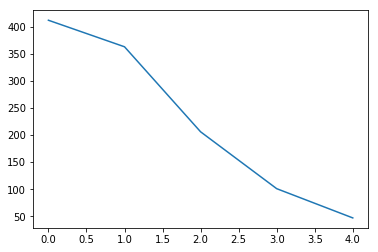

Real Percentage of gain: 51.84074090065657
Percentage of gain: 0.5418600242671798
Total gain: 612.3018274219132
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 62 170]
 [ 25 154]]
0.5255474452554745
Percentile:  1
[[ 30  81]
 [ 79 173]]
0.559228650137741
Percentile:  2
[[20 77]
 [30 79]]
0.48058252427184467
Percentile:  3
[[ 0 14]
 [28 59]]
0.5841584158415841
Percentile:  4
[[47]]
1.0
000000000000000000000000000000000000000000000000
Working on... MSFT
5.843279709392834
0.0
Diff in tren train and test
0.6778686712359053
0.6292035398230088
F1,score 0.2957446808510638
G-score: 0.3917991931110788
Accuracy 0.41415929203539825
Window: 140
[[329  90]
 [572 139]]
Vol pos 1.2828633562422938
Vol neg 1.78171359936656


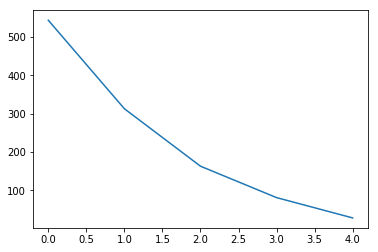

Real Percentage of gain: -32.42354671350944
Percentage of gain: -0.5124905770436011
Total gain: -579.1143520592693
000000000000000000000000000000000000000000000000
Percentile:  0
[[253  39]
 [221  31]]
0.5220588235294118
Percentile:  1
[[ 55  19]
 [186  53]]
0.3450479233226837
Percentile:  2
[[ 10  13]
 [103  37]]
0.2883435582822086
Percentile:  3
[[ 9 11]
 [48 13]]
0.2716049382716049
Percentile:  4
[[ 2  8]
 [14  4]]
0.21428571428571427
000000000000000000000000000000000000000000000000
Working on... FB
12.871078806426938
0.005182421227207363
Diff in tren train and test
0.5687789799072643
0.7676678445229682
F1,score 0.5302911093627065
G-score: 0.5403308735883823
Accuracy 0.4726148409893993
Window: 140
[[198  65]
 [532 337]]
Vol pos 3.3268677050280746
Vol neg 2.8543517209194382


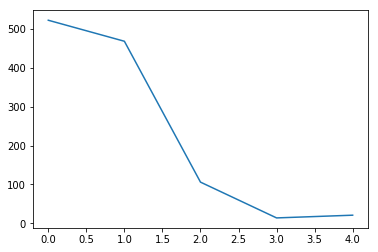

Real Percentage of gain: -69.58491425262928
Percentage of gain: 0.06698431519533155
Total gain: 75.82624480111531
000000000000000000000000000000000000000000000000
Percentile:  0
[[194  18]
 [257  53]]
0.4731800766283525
Percentile:  1
[[  3  34]
 [250 181]]
0.39316239316239315
Percentile:  2
[[ 0 13]
 [25 67]]
0.638095238095238
Percentile:  3
[[14]]
1.0
Percentile:  4
[[21]]
1.0
000000000000000000000000000000000000000000000000
Working on... INTC
6.746031746031759
0.009064539521396952
Diff in tren train and test
0.592183705012144
0.6042402826855123
F1,score 0.23703703703703705
G-score: 0.36187343222787294
Accuracy 0.4540636042402827
Window: 140
[[418  30]
 [588  96]]
Vol pos 2.618097123454006
Vol neg 2.0910764238157404


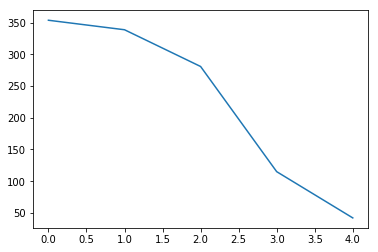

Real Percentage of gain: -58.583706260486636
Percentage of gain: 0.04718789005055795
Total gain: 53.4166915372316
000000000000000000000000000000000000000000000000
Percentile:  0
[[100  16]
 [214  24]]
0.3502824858757062
Percentile:  1
[[107   7]
 [188  40]]
0.4298245614035088
Percentile:  2
[[121   6]
 [124  27]]
0.5323741007194245
Percentile:  3
[[62  1]
 [46  5]]
0.5877192982456141
Percentile:  4
[[28  0]
 [14  0]]
0.6666666666666666
000000000000000000000000000000000000000000000000
Working on... CSCO
6.455652128779988
0.0
Diff in tren train and test
0.6754775655264327
0.576
F1,score 0.0
G-score: 0.0
Accuracy 0.4231111111111111
Window: 140
[[476   1]
 [648   0]]
Vol pos 2.168887878813392
Vol neg 1.6015799473893204


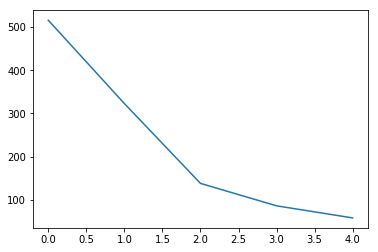

Real Percentage of gain: 13.378913617502798
Percentage of gain: -0.006253116035995036
Total gain: -7.034755540494416
000000000000000000000000000000000000000000000000
Percentile:  0
[[219   1]
 [296   0]]
0.42441860465116277
Percentile:  1
[[ 96   0]
 [227   0]]
0.29721362229102166
Percentile:  2
[[50  0]
 [88  0]]
0.36231884057971014
Percentile:  3
[[58  0]
 [28  0]]
0.6744186046511628
Percentile:  4
[[52  0]
 [ 6  0]]
0.896551724137931
000000000000000000000000000000000000000000000000
Working on... CMCSA
10.63829787234043
0.0
Diff in tren train and test
0.45605123674911663
0.5229681978798587
F1,score 0.5018181818181818
G-score: 0.5156703558630416
Accuracy 0.5159010600706714
Window: 140
[[308 232]
 [316 276]]
Vol pos 2.9915429362772574
Vol neg 2.713505579253586


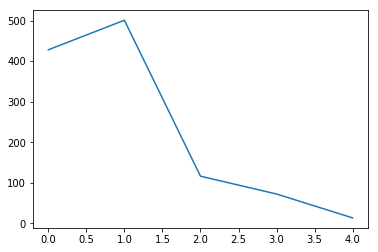

Real Percentage of gain: 85.84423989644755
Percentage of gain: 0.2297349976633861
Total gain: 260.06001735495306
000000000000000000000000000000000000000000000000
Percentile:  0
[[128  99]
 [122  79]]
0.48364485981308414
Percentile:  1
[[119  78]
 [163 141]]
0.5189620758483033
Percentile:  2
[[15 27]
 [26 48]]
0.5431034482758621
Percentile:  3
[[38 22]
 [ 4  8]]
0.6388888888888888
Percentile:  4
[[7 6]
 [0 0]]
0.5384615384615384
000000000000000000000000000000000000000000000000
Working on... NVDA
14.360220994475142
0.0


KeyboardInterrupt: 

In [7]:
import warnings
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings('ignore')
o=0
accstocksresults=[]
f1stocksresults=[]
f1scoreresults=[]
aucresults=[]
chartlist=[]
gainlist=[]
pricegainlist=[]

for price in prices:
    #print('New price[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]')
    
   
    print('Working on...',files[o])
    
    senttemp=sentiment[o]
    senttemp=np.nan_to_num(np.asarray(senttemp, dtype=float))
    
    xtemp=price
    o+=1
    xtemp=np.nan_to_num(np.asarray(xtemp, dtype=float))
    
    #print(xtemp)
    accintime=[]
    trendwindowtime=[140]
    f1total=[]
    acctotal=[]
    auctotal=[]
    percfinal=[]
    f1scoretotal=[]
    percpostotal=[]
    percnegtotal=[]
    for t in trendwindowtime:
        #1
    #label because of the maket and append values without data
    #simo theroy past trend
        
        x=[]
        y=[]
        percentage=[]
        yprice=[]
        yvolatility=[]
        #print('============================================================')
        #print('Working on window:',t)
        #print(len(xtemp))
        ##QUI C E L'UNICO APPUNTO GUARDA SE CON +1 CAMBIA
        for i in range(0,len(price)-t-1):
            s=np.sign(price.iloc[i+t+1]['close']-price.iloc[i+1]['open'])
            percentage.append((100*(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))/price.iloc[i+1]['open']) 
            if(s==-1):
                y.append(0)
            else:
                y.append(1)
            yvolatility.append((100*abs(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))/price.iloc[i+1]['open'])
            yprice.append(abs(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))
            x.append(np.concatenate((senttemp[i],xtemp[i])))
        y=np.array(y)
        x=np.array(x)
        scaler = MinMaxScaler() 
        scaler.fit(x)
        MinMaxScaler(copy=True, feature_range=(0, 1))
        x=scaler.transform(x)
        
        percentage=np.array(percentage)
        permindex=range(0,len(x))
        #permindex=np.random.permutation(permindex)
        train=0.8
        nt=math.ceil(len(x)*train)
        trainvalindex=permindex[0:nt]
        testindex=permindex[nt:]
        
        yvolatility=np.array(yvolatility)
        x_tv=[]
        y_tv=[]
        x_test=[]
        y_test=[]
        x_tv=x[trainvalindex]
        y_tv=y[trainvalindex]
        x_test=x[testindex]
        y_test=y[testindex]
        yvolatilitytest=yvolatility[testindex]
        #create structure for percentile valuation
        distribution=[]
        print(max(yvolatilitytest))
        print(min(yvolatilitytest))
        step=(max(yvolatilitytest)-min(yvolatilitytest))/5
        for v in range(0,5):
            pindexes=[]
            for r in range(0,len(y_test)):
                if(yvolatilitytest[r]<min(yvolatilitytest)+step+step*v and yvolatilitytest[r]>min(yvolatilitytest)+step*v):
                    pindexes.append(r)
            distribution.append(pindexes)
    

        cspace=np.logspace(-4,4,10)
        gspace=np.logspace(-4,4,10)
        bestsvm=None
        maxacc=0
        cvacc=0
        maxg=0
        maxc=0
        #print('Model Selection...')
        #model selection
        cvacc=0
        totu=0
        for c in cspace:
            #print()
            for g in gspace:
                
                cvacclist=[]
                #faccio cross validation
                #start with 40% as train and 10% for validation and then i move in percentege
                # 0-40 40-50
                # 0-50 50-60
                # 0-60 60-70 
                #etc test set is completely external i do in some way error extimation changin the ticker
                trainpoint=math.floor(len(x_tv)*0.40)
                dimval=math.floor(trainpoint*0.25)
                endval=trainpoint+dimval
                
                for i in range(0,6):
                    #print('-----')
                    x_train=x_tv[0:trainpoint]
                    y_train=y_tv[0:trainpoint]
                    x_val=x_tv[trainpoint:endval]
                    y_val=y_tv[trainpoint:endval]
                    #print(trainpoint)
                    #print(endval)
                    #print(len(x_tv))
                    trainpoint=trainpoint+dimval
                    endval=endval+dimval
                    p=sum(y_train)/(len(y_train)-sum(y_train))
                    rbf_svm=svm.SVC(kernel='rbf',C=c,gamma=g)
                    x_train,y_train=smote(x_train,y_train)
                    rbf_svm.fit(x_train,y_train)
                    
                    
                    if(sum(y_val)+6<len(x_val) and sum(y_val)>6):
                        x_val,y_val=smote(x_val,y_val)
                    else:
                        totu=totu+1
                    prediction=rbf_svm.predict(x_val)
                    
                    cvacclist.append(geometric_mean_score(y_val, prediction))
                    
                cvacc=sum(cvacclist)/len(cvacclist)
                if(cvacc>maxacc):
                    #print(cvacc)
                    maxacc=cvacc
                    maxg=g
                    maxc=c
                    bestsvm=rbf_svm

        
        print('Diff in tren train and test')
        print(sum(y_tv)/len(y_tv))
        print(sum(y_test)/len(y_test))
        p=sum(y_tv)/(len(y_tv)-sum(y_tv))
        rbf_svm=svm.SVC(kernel='rbf',C=maxc, gamma=maxg )
        x_tv,y_tv=smote(x_tv,y_tv)
        rbf_svm.fit(x_tv,y_tv)
        prediction=rbf_svm.predict(x_test)
        volr=[]
        voln=[]
        pricegain=0
        for j in range(0,len(x_test)):
            if(y_test[j]==prediction[j]):
                volr.append(yvolatilitytest[j])
                pricegain=pricegain+yprice[j]
            else:
                voln.append(yvolatilitytest[j])
                pricegain=pricegain-yprice[j]
        confmatrix=confusion_matrix(y_test, prediction)
        CM = f1_score(y_test, prediction)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction)
        auc=metrics.auc(fpr, tpr)
        valueacc=geometric_mean_score(y_test, prediction)
        
        
        print('F1,score',CM)
        print('G-score:',valueacc)
        realacc=rbf_svm.score(x_test,y_test)
        print('Accuracy',realacc)
        print('Window:',t)
        print(confmatrix)
        print('Vol pos',sum(volr)/len(volr))
        print('Vol neg',sum(voln)/len(voln))
        percnegtotal.append(sum(volr)/len(volr))
        percpostotal.append(sum(voln)/len(voln))
        #build structure to plot distribution onver percentile
        chart=np.zeros(5)
        for r in range(0,len(y_test)):
            for v in range(0,5):
                if(yvolatilitytest[r]<min(yvolatility)+step+step*v and yvolatilitytest[r]>min(yvolatility)+step*v):
                    chart[v]+=1
        plt.plot(chart)
        plt.show()
        print('Real Percentage of gain:',(pricegain*100)/(sum(price.iloc[1:6]['open'])))
        pricegainlist.append((pricegain*100)/(sum(price.iloc[1:6]['open'])))
        print('Percentage of gain:',(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('Total gain:',len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        gainlist.append(len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('000000000000000000000000000000000000000000000000')
        #performances for each percentile
        chartscore=[]
        for g in range(0,len(distribution)):
            print('Percentile: ',g)
            tempscore=0
            if(len(distribution[g])>0):
                predictionp=rbf_svm.predict(x_test[distribution[g]])
                print(confusion_matrix(y_test[distribution[g]], predictionp))
                print(rbf_svm.score(x_test[distribution[g]],y_test[distribution[g]]))
                tempscore=rbf_svm.score(x_test[distribution[g]],y_test[distribution[g]])
            chartscore.append(tempscore)    
        chartlist.append(chartscore)
        print('000000000000000000000000000000000000000000000000')
print('Mean gain over portfolio : ', sum(gainlist)/len(gainlist))
print('Real mean gain over portfolio',sum(pricegainlist)/len(pricegainlist))
#print all the accuracy varing the percentile
for st in range(0,len(chartlist)):
    plt.plot(chartlist[st])
plt.show()
        
        
        

In [ ]:
tot=np.zeros(5)
for st in range(0,len(chartlist)):
    tot=chartlist[st]+tot
    
tot=tot/20
plt.plot(tot)
plt.show()

In [ ]:
import warnings
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings('ignore')
o=0
accstocksresults=[]
f1stocksresults=[]
f1scoreresults=[]
aucresults=[]
chartlist=[]
gainlist=[]
pricegainlist=[]

for price in prices:
    #print('New price[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]')
    
   
    print('Working on...',files[o])
    
    senttemp=sentiment[o]
    senttemp=np.nan_to_num(np.asarray(senttemp, dtype=float))
    
    xtemp=price
    o+=1
    xtemp=np.nan_to_num(np.asarray(xtemp, dtype=float))
    
    #print(xtemp)
    accintime=[]
    trendwindowtime=[140]
    f1total=[]
    acctotal=[]
    auctotal=[]
    percfinal=[]
    f1scoretotal=[]
    percpostotal=[]
    percnegtotal=[]
    for t in trendwindowtime:
        #1
    #label because of the maket and append values without data
    #simo theroy past trend
        
        x=[]
        y=[]
        percentage=[]
        yprice=[]
        yvolatility=[]
        #print('============================================================')
        #print('Working on window:',t)
        #print(len(xtemp))
        ##QUI C E L'UNICO APPUNTO GUARDA SE CON +1 CAMBIA
        for i in range(0,len(price)-t-1):
            s=np.sign(price.iloc[i+t+1]['close']-price.iloc[i+1]['open'])
            percentage.append((100*(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))/price.iloc[i+1]['open']) 
            if(s==-1):
                y.append(0)
            else:
                y.append(1)
            yvolatility.append((100*abs(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))/price.iloc[i+1]['open'])
            yprice.append(abs(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))
            x.append(np.concatenate((senttemp[i],xtemp[i])))
        y=np.array(y)
        x=np.array(x)
        scaler = MinMaxScaler() 
        scaler.fit(x)
        MinMaxScaler(copy=True, feature_range=(0, 1))
        x=scaler.transform(x)
        
        percentage=np.array(percentage)
        permindex=range(0,len(x))
        #permindex=np.random.permutation(permindex)
        train=0.8
        nt=math.ceil(len(x)*train)
        trainvalindex=permindex[0:nt]
        testindex=permindex[nt:]
        
        yvolatility=np.array(yvolatility)
        x_tv=[]
        y_tv=[]
        x_test=[]
        y_test=[]
        x_tv=x[trainvalindex]
        y_tv=y[trainvalindex]
        x_test=x[testindex]
        y_test=y[testindex]
        yvolatilitytest=yvolatility[testindex]
        #create structure for percentile valuation
        distribution=[]
        print(max(yvolatilitytest))
        print(min(yvolatilitytest))
        step=(max(yvolatilitytest)-min(yvolatilitytest))/5
        for v in range(0,5):
            pindexes=[]
            for r in range(0,len(y_test)):
                if(yvolatilitytest[r]<min(yvolatilitytest)+step+step*v and yvolatilitytest[r]>min(yvolatilitytest)+step*v):
                    pindexes.append(r)
            distribution.append(pindexes)
    

        cspace=np.logspace(-4,4,10)
        gspace=np.logspace(-4,4,10)
        bestsvm=None
        maxacc=0
        cvacc=0
        maxg=0
        maxc=0
        #print('Model Selection...')
        #model selection
        cvacc=0
        totu=0
        for c in cspace:
            #print()
            for g in gspace:
                
                cvacclist=[]
                #faccio cross validation
                #start with 40% as train and 10% for validation and then i move in percentege
                # 0-40 40-50
                # 0-50 50-60
                # 0-60 60-70 
                #etc test set is completely external i do in some way error extimation changin the ticker
                trainpoint=math.floor(len(x_tv)*0.40)
                dimval=math.floor(trainpoint*0.25)
                endval=trainpoint+dimval
                
                for i in range(0,6):
                    #print('-----')
                    x_train=x_tv[0:trainpoint]
                    y_train=y_tv[0:trainpoint]
                    x_val=x_tv[trainpoint:endval]
                    y_val=y_tv[trainpoint:endval]
                    #print(trainpoint)
                    #print(endval)
                    #print(len(x_tv))
                    trainpoint=trainpoint+dimval
                    endval=endval+dimval
                    p=sum(y_train)/(len(y_train)-sum(y_train))
                    rbf_svm=svm.SVC(kernel='rbf',C=c,gamma=g)
                    x_train,y_train=smote(x_train,y_train)
                    rbf_svm.fit(x_train,y_train)
                    
                    
                    if(sum(y_val)+6<len(x_val) and sum(y_val)>6):
                        x_val,y_val=smote(x_val,y_val)
                    else:
                        totu=totu+1
                    prediction=rbf_svm.predict(x_val)
                    
                    cvacclist.append(geometric_mean_score(y_val, prediction))
                    
                cvacc=sum(cvacclist)/len(cvacclist)
                if(cvacc>maxacc):
                    #print(cvacc)
                    maxacc=cvacc
                    maxg=g
                    maxc=c
                    bestsvm=rbf_svm

        
        print('Diff in tren train and test')
        print(sum(y_tv)/len(y_tv))
        print(sum(y_test)/len(y_test))
        p=sum(y_tv)/(len(y_tv)-sum(y_tv))
        rbf_svm=svm.SVC(kernel='rbf',C=maxc, gamma=maxg )
        x_tv,y_tv=smote(x_tv,y_tv)
        rbf_svm.fit(x_tv,y_tv)
        prediction=rbf_svm.predict(x_test)
        volr=[]
        voln=[]
        pricegain=0
        for j in range(0,len(x_test)):
            if(y_test[j]==prediction[j]):
                volr.append(yvolatilitytest[j])
                pricegain=pricegain+yprice[j]
            else:
                voln.append(yvolatilitytest[j])
                pricegain=pricegain-yprice[j]
        confmatrix=confusion_matrix(y_test, prediction)
        CM = f1_score(y_test, prediction)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction)
        auc=metrics.auc(fpr, tpr)
        valueacc=geometric_mean_score(y_test, prediction)
        
        
        print('F1,score',CM)
        print('G-score:',valueacc)
        realacc=rbf_svm.score(x_test,y_test)
        print('Accuracy',realacc)
        print('Window:',t)
        print(confmatrix)
        print('Vol pos',sum(volr)/len(volr))
        print('Vol neg',sum(voln)/len(voln))
        percnegtotal.append(sum(volr)/len(volr))
        percpostotal.append(sum(voln)/len(voln))
        #build structure to plot distribution onver percentile
        chart=np.zeros(5)
        for r in range(0,len(y_test)):
            for v in range(0,5):
                if(yvolatilitytest[r]<min(yvolatility)+step+step*v and yvolatilitytest[r]>min(yvolatility)+step*v):
                    chart[v]+=1
        plt.plot(chart)
        plt.show()
        print('Real Percentage of gain:',(pricegain*100)/(sum(price.iloc[1:6]['open'])))
        pricegainlist.append((pricegain*100)/(sum(price.iloc[1:6]['open'])))
        print('Percentage of gain:',(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('Total gain:',len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        gainlist.append(len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('000000000000000000000000000000000000000000000000')
        #performances for each percentile
        chartscore=[]
        for g in range(0,len(distribution)):
            print('Percentile: ',g)
            tempscore=0
            if(len(distribution[g])>0):
                predictionp=rbf_svm.predict(x_test[distribution[g]])
                print(confusion_matrix(y_test[distribution[g]], predictionp))
                print(rbf_svm.score(x_test[distribution[g]],y_test[distribution[g]]))
                tempscore=rbf_svm.score(x_test[distribution[g]],y_test[distribution[g]])
            chartscore.append(tempscore)    
        chartlist.append(chartscore)
        print('000000000000000000000000000000000000000000000000')
print('Mean gain over portfolio : ', sum(gainlist)/len(gainlist))
print('Real mean gain over portfolio',sum(pricegainlist)/len(pricegainlist))
#print all the accuracy varing the percentile
for st in range(0,len(chartlist)):
    plt.plot(chartlist[st])
plt.show()
        
        
        

In [ ]:
tot=np.zeros(5)
for st in range(0,len(chartlist)):
    tot=chartlist[st]+tot
    
tot=tot/20
plt.plot(tot)
plt.show()

In [ ]:
temp=accstocksresults

In [ ]:
top10=np.argpartition(meanvalue, -20)[-20:]

In [ ]:

for i in range(0,len(top10)):
    print(files[top10[i]])